# Loading Dataset

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
url='https://raw.githubusercontent.com/charcode123/SUPERSTORE-SALES-PREDICTION/main/DATA/train.csv'
sales=pd.read_csv(url)

In [93]:
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# taking a quick look at our data


In [94]:
sales.shape

(9800, 18)

* there are 9800 rows  and 18 columns

In [95]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [96]:
print(sales.isna().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [97]:
# change data type of "Order Date" and "Ship Date" to datetime format
sales['Order Date'] = pd.to_datetime(sales['Order Date'], format="%d-%m-%Y")
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'], format="%d-%m-%Y")
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

checking 'Postal Code' column data for null values

In [98]:
sales[sales['Postal Code'].isna()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [99]:
# First dates and last dates of Order dates and Ship dates
print("Describe Order date:")
print(sales['Order Date'].describe(), "\n")
print("Describe Ship date:")
print(sales['Ship Date'].describe())

Describe Order date:
count                    9800
unique                   1230
top       2017-09-05 00:00:00
freq                       38
first     2015-01-03 00:00:00
last      2018-12-30 00:00:00
Name: Order Date, dtype: object 

Describe Ship date:
count                    9800
unique                   1326
top       2018-09-26 00:00:00
freq                       34
first     2015-01-07 00:00:00
last      2019-01-05 00:00:00
Name: Ship Date, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """


In [100]:
# unique counts of all values in the data
sales.nunique()

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

- Top Customer Names, Top Citys, Top States, Top Product Names
- Ship Mode, Segment, Region, Category, Sub-Category 

# Exploratory data Analysis

## BY CHARAN 

In [101]:
DATA1=pd.DataFrame()
DATA1=sales[0:1600]
DATA1.shape

(1600, 18)

### Most Valuable Customers

get the top 20 customers who has generated max revenue/profit for the company.

In [102]:
top_customers = DATA1.groupby(by=['Customer Name']).sum().round(2)
top_customers = top_customers.sort_values('Sales', ascending=False).head(20)

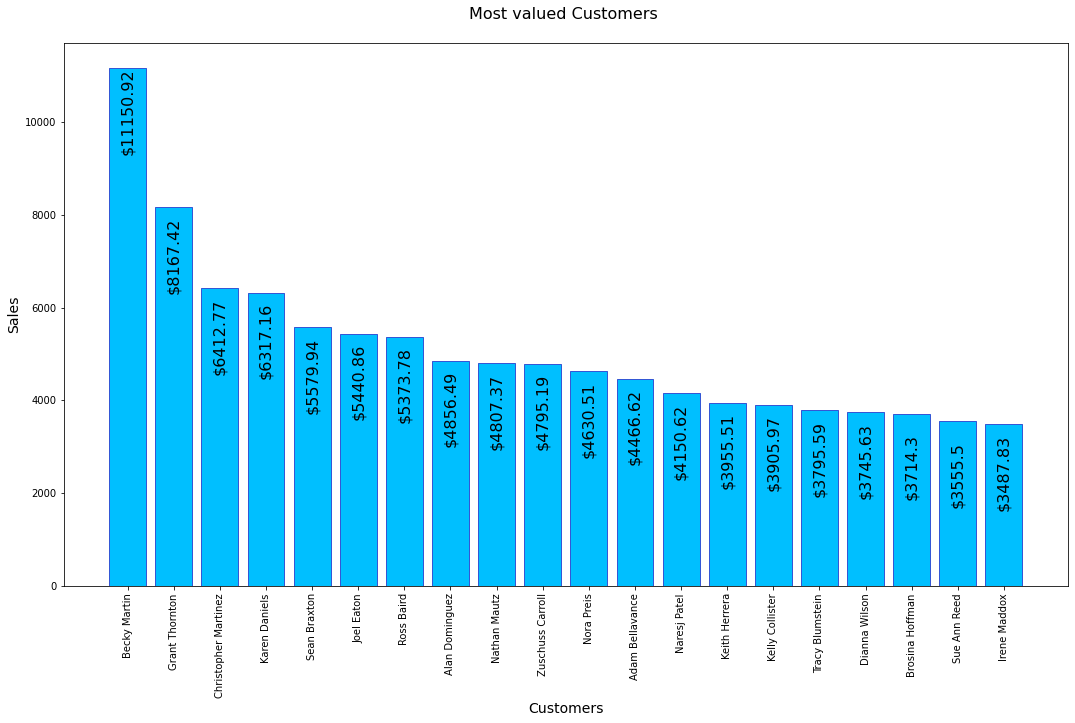

In [103]:
# plot bar of the top valued customers
plt.figure(figsize=[18,10])
plt.bar(top_customers.index, top_customers.Sales, color='#00BFFF', edgecolor='#3457D5')
plt.xticks(rotation=90)
plt.title("Most valued Customers \n", fontsize=16)
plt.xlabel('Customers', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in enumerate(top_customers.Sales):
    plt.text(i, v-1800, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    
plt.show()

BECKY MARTIN WAS THE MOST VALUABLE CUSTOMER FOR DATA1

### Top Revenue Generated Cites

Let's get the top Revenue generating cites for the company.

In [104]:
top_cities = DATA1.groupby(by=['City']).sum().round(2)
top_cities = top_cities.sort_values('Sales', ascending=False).head(20)

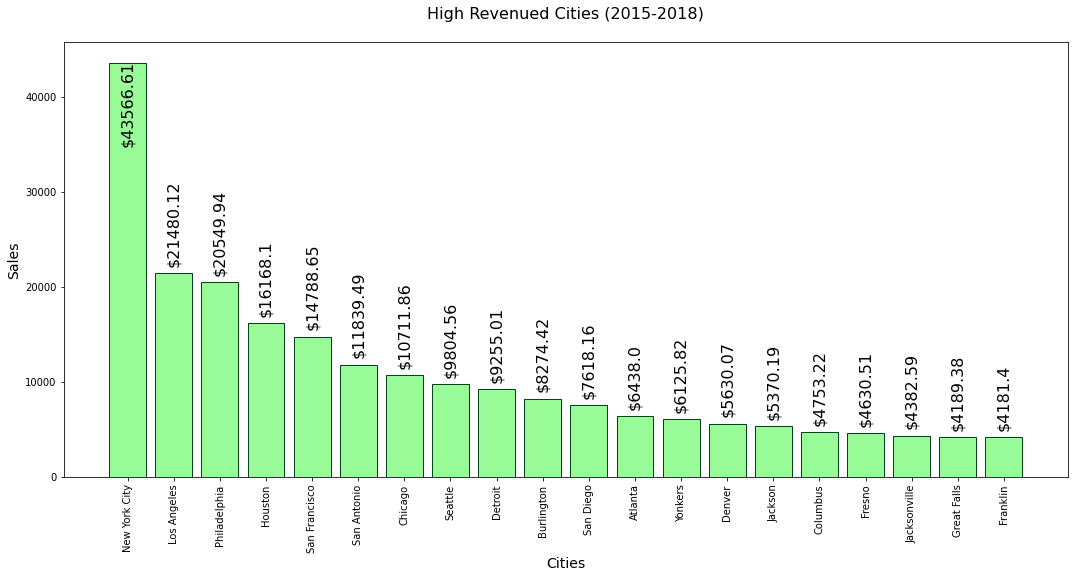

In [105]:
# plot bar of the top revenue generated Cities
plt.figure(figsize=[18,8])
plt.bar(top_cities.index, top_cities.Sales, color='#98FB98', edgecolor='#01411C')
plt.xticks(rotation=90)
plt.title("High Revenued Cities (2015-2018)\n", fontsize=16)
plt.xlabel('Cities', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in top_cities.Sales.items():
    if v>40000:
        plt.text(i, v-8500, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+1000, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    
plt.show()

NEW YORK GENERATED HIGHEST REVENUE IN DATA1

### Top Revenue Generated States

let's get the top Revenue generated states for the company

In [106]:
top_states = DATA1.groupby(by=['State']).sum().round(2)
top_states = top_states.sort_values('Sales', ascending=False).head(20)

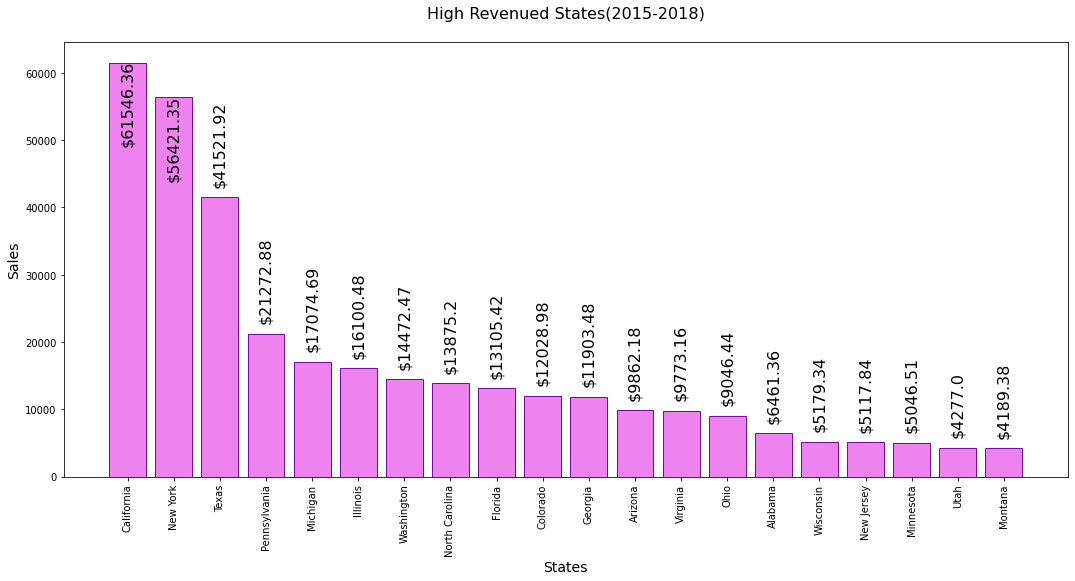

In [107]:
# plot bar of the top revenue generated States
plt.figure(figsize=[18,8])
plt.bar(top_states.index, top_states.Sales, color='#EE82EE', edgecolor='#720e9e')
plt.xticks(rotation=90)
plt.title("High Revenued States(2015-2018)\n", fontsize=16)
plt.xlabel('States', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in top_states.Sales.items():
    if v>50000:
        plt.text(i, v-12000, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+2000, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    
plt.show()

CALIFORNIA GENERATED HIGHEST REVENUE IN DATA1

### Top Products that has generated more sales.

Let's analyze the Top Products for the company.

In [108]:
top_products = DATA1.groupby(by=['Product Name']).sum().round(2)
top_products = top_products.sort_values('Sales', ascending=False).head(20)

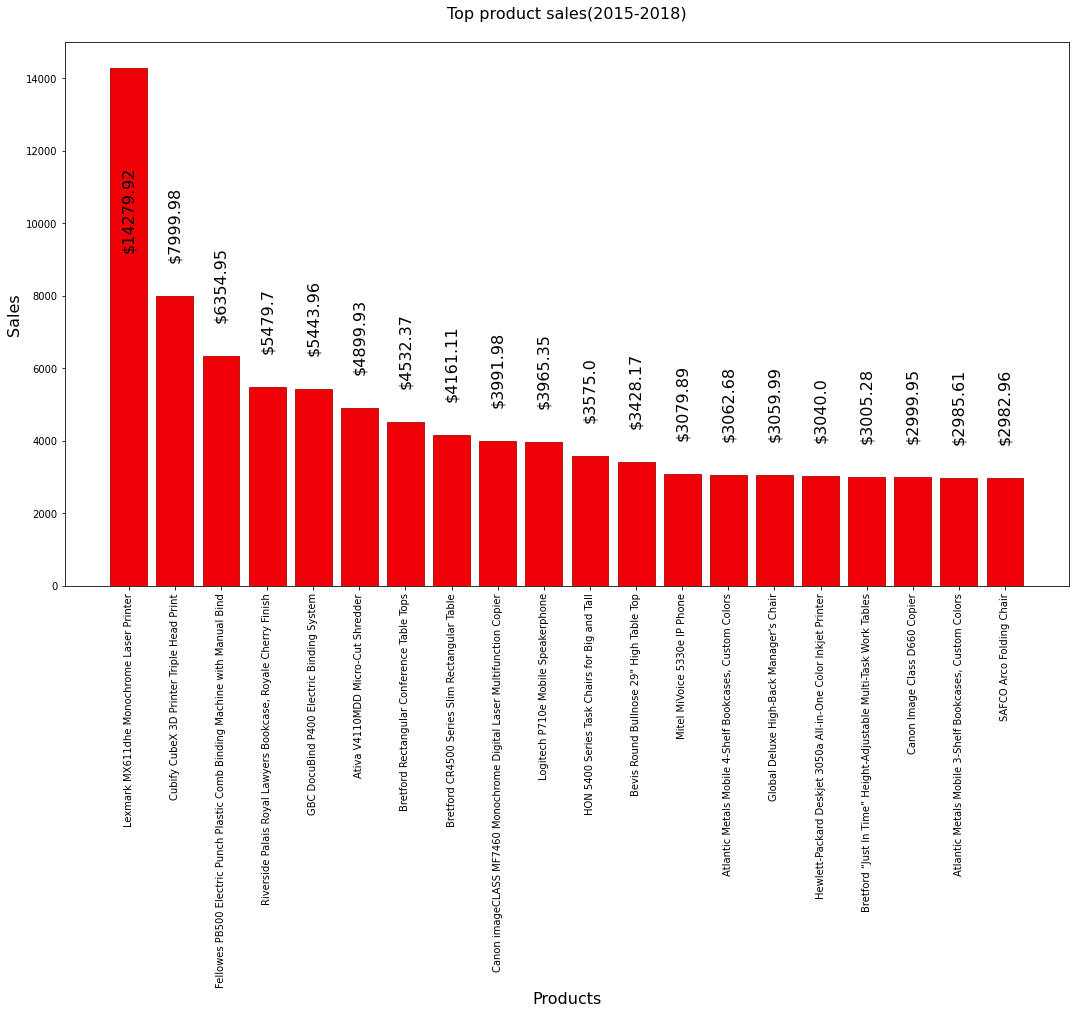

In [109]:
# plot bar of the top Products with highest sales
plt.figure(figsize=[18,10])
plt.bar(top_products.index, top_products.Sales, color='#EF0107', edgecolor='#B31B1B')
plt.xticks(rotation=90)
plt.title("Top product sales(2015-2018)\n", fontsize=16)
plt.xlabel('Products', fontsize=16)
plt.ylabel('Sales', fontsize=16)

for i, v in top_products.Sales.items():
    if v>12000:
        plt.text(i, v-5000, s='$'+str(v), color='black', fontsize=16 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+1000, s='$'+str(v), color='black', fontsize=16 ,rotation=90, horizontalalignment='center')
    
plt.show()

Lexmark MX611dhe Monochrone Laser Printer was most sold product.

### Get the column analysis wrt count and sales data.

In [110]:
# columns that have less than 20 unique values
cat_cols_dic = {}
for i in range(len(DATA1.nunique())):
    if DATA1.nunique().values[i]<=20:
        cat_cols_dic[DATA1.nunique().index[i]] = DATA1.nunique().values[i]

print(cat_cols_dic)

{'Ship Mode': 4, 'Segment': 3, 'Country': 1, 'Region': 4, 'Category': 3, 'Sub-Category': 17}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


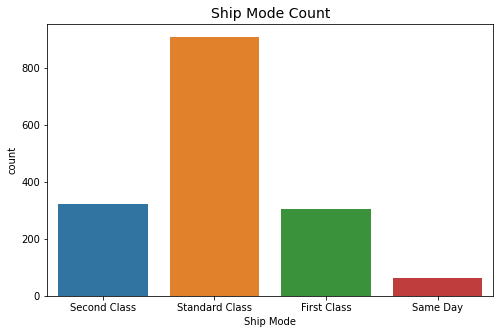

In [111]:
# ship mode count visualization
plt.figure(figsize=[8,5])
sns.countplot(DATA1['Ship Mode'])
plt.title("Ship Mode Count", fontsize=14)
plt.show()

standard class was most favoured mode of shipping

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


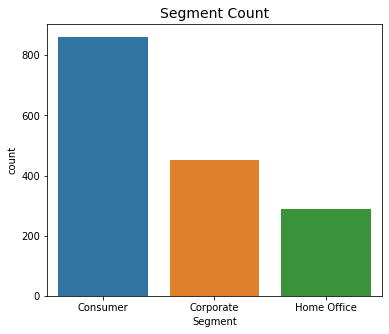

In [112]:
# segment count visualization
plt.figure(figsize=[6,5])
sns.countplot(DATA1['Segment'])
plt.title("Segment Count", fontsize=14)
plt.show()

most of the sales came from consumers

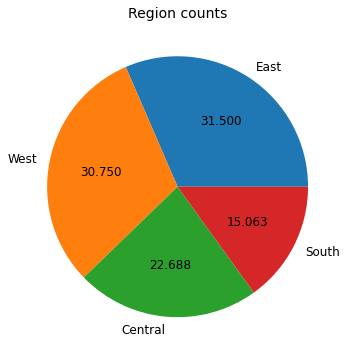

In [113]:
# pie chat for 'region'
plt.figure(figsize=[6, 6])
plt.pie(DATA1['Region'].value_counts(normalize=True), labels= DATA1['Region'].value_counts().index, autopct="%.3f", textprops={'color': 'Black', 'fontsize': 12})
plt.title("Region counts", fontsize=14,color='Black')
plt.show()

Most exchange was done in EAST region

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


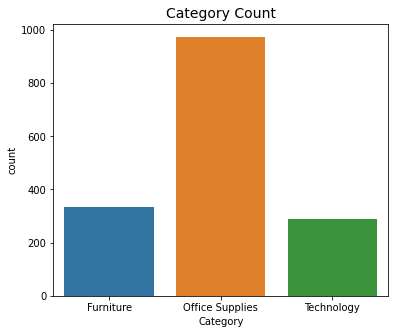

In [114]:
# Category count visualization
plt.figure(figsize=[6,5])
sns.countplot(DATA1['Category'])
plt.title("Category Count", fontsize=14)
plt.show()

Most products were Office Supplies Category

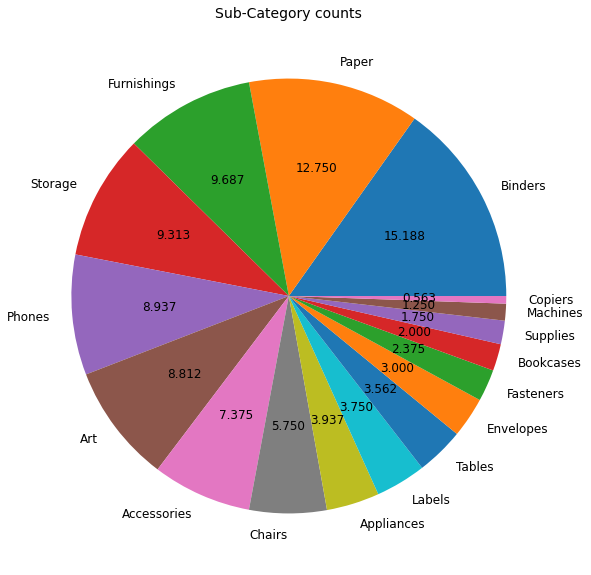

In [115]:
# pie chat for 'sub-category'
plt.figure(figsize=[10, 10])
plt.pie(DATA1['Sub-Category'].value_counts(normalize=True)*100, labels= DATA1['Sub-Category'].value_counts().index, autopct="%.3f", textprops={'color': 'Black', 'fontsize': 12})
plt.title("Sub-Category counts", fontsize=14,color='Black')
plt.show()

Highest sub category count was Blinders

## BY NAVYA

In [116]:
DATA2=pd.DataFrame()
DATA2=sales[1600:3200]
DATA2.shape

(1600, 18)

### MOST VALUABLE CUSTOMER

In [117]:
top_customers = DATA2.groupby(by=['Customer Name']).sum().round(2)
top_customers = top_customers.sort_values('Sales', ascending=False).head(20)

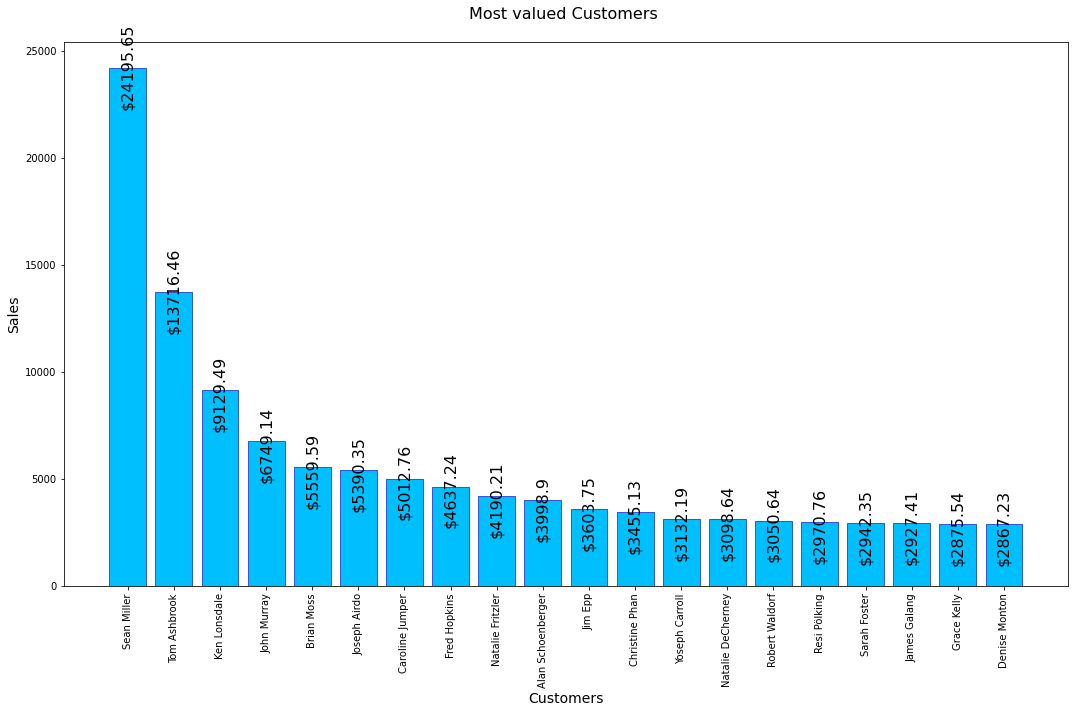

In [118]:
# plot bar of the top valued customers
plt.figure(figsize=[18,10])
plt.bar(top_customers.index, top_customers.Sales, color='#00BFFF', edgecolor='#3457D5')
plt.xticks(rotation=90)
plt.title("Most valued Customers \n", fontsize=16)
plt.xlabel('Customers', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in enumerate(top_customers.Sales):
    plt.text(i, v-1800, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    
plt.show()

SEAN MILLER WAS THE MOST VALUABLE CUSTOMER FOR DATA 2

### TOP REVENUE GENERATED CITIES 

In [119]:
top_cities = DATA2.groupby(by=['City']).sum().round(2)
top_cities = top_cities.sort_values('Sales', ascending=False).head(20)

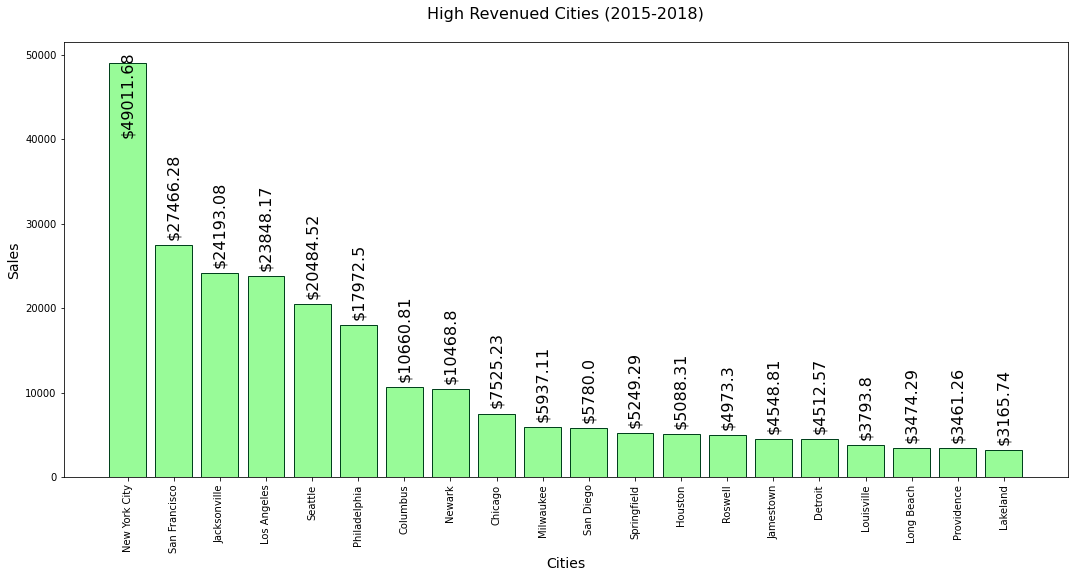

In [120]:
# plot bar of the top revenue generated Cities
plt.figure(figsize=[18,8])
plt.bar(top_cities.index, top_cities.Sales, color='#98FB98', edgecolor='#01411C')
plt.xticks(rotation=90)
plt.title("High Revenued Cities (2015-2018)\n", fontsize=16)
plt.xlabel('Cities', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in top_cities.Sales.items():
    if v>40000:
        plt.text(i, v-8500, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+1000, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    
plt.show()

NEW YORK CITY GENERATED HIGHEST REVENUE IN DATA 2 

In [121]:
top_states = DATA2.groupby(by=['State']).sum().round(2)
top_states = top_states.sort_values('Sales', ascending=False).head(20)

### TOP REVENUE GENERATING STATES

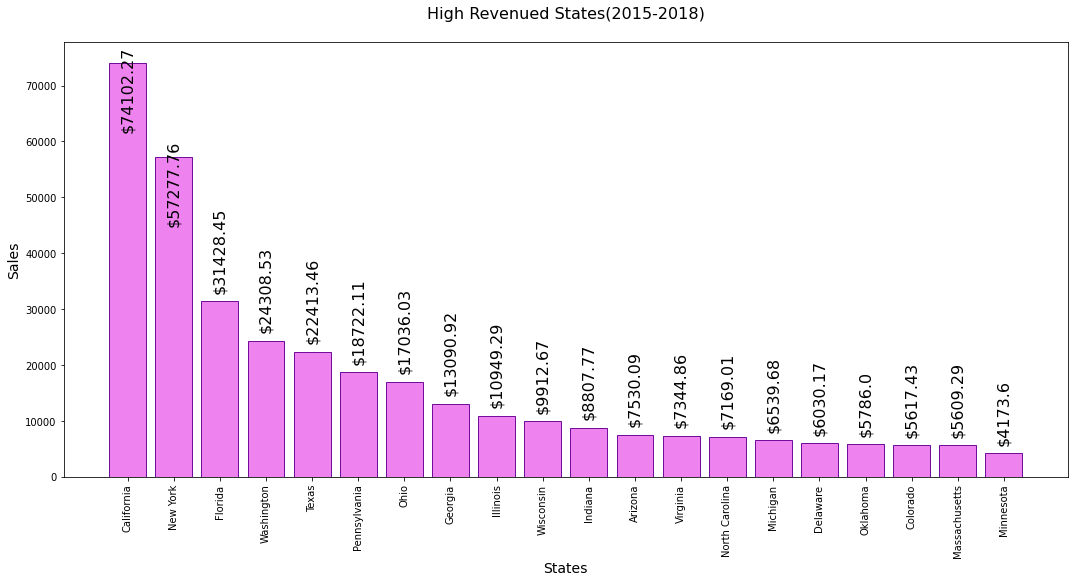

In [122]:
# plot bar of the top revenue generated States
plt.figure(figsize=[18,8])
plt.bar(top_states.index, top_states.Sales, color='#EE82EE', edgecolor='#720e9e')
plt.xticks(rotation=90)
plt.title("High Revenued States(2015-2018)\n", fontsize=16)
plt.xlabel('States', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in top_states.Sales.items():
    if v>50000:
        plt.text(i, v-12000, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+2000, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    
plt.show()

CALIFORNIA GENERATED HIGHEST REVENUE IN DATA 2

### TOP PRODUCTS THAT GENERATED MOST SALES 

In [123]:
top_products = DATA2.groupby(by=['Product Name']).sum().round(2)
top_products = top_products.sort_values('Sales', ascending=False).head(20)

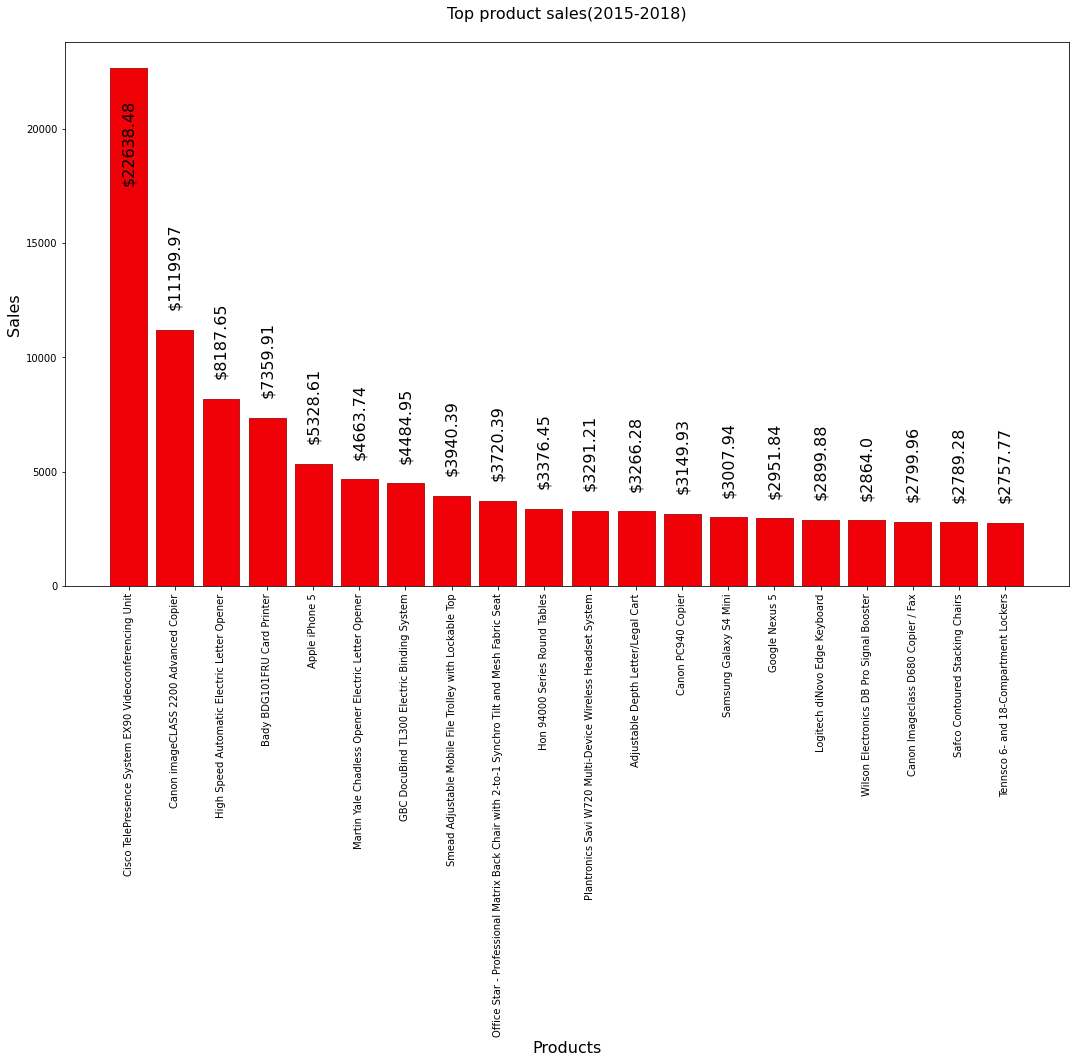

In [124]:
# plot bar of the top Products with highest sales
plt.figure(figsize=[18,10])
plt.bar(top_products.index, top_products.Sales, color='#EF0107', edgecolor='#B31B1B')
plt.xticks(rotation=90)
plt.title("Top product sales(2015-2018)\n", fontsize=16)
plt.xlabel('Products', fontsize=16)
plt.ylabel('Sales', fontsize=16)

for i, v in top_products.Sales.items():
    if v>12000:
        plt.text(i, v-5000, s='$'+str(v), color='black', fontsize=16 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+1000, s='$'+str(v), color='black', fontsize=16 ,rotation=90, horizontalalignment='center')
    
plt.show()

CISCO TELEPRESENCE SYSTEM EX90 WAS THE MOST SOLD PRODUCT

### Get the column analysis wrt count and sales data.

In [125]:
# columns that have less than 20 unique values
cat_cols_dic = {}
for i in range(len(DATA2.nunique())):
    if DATA2.nunique().values[i]<=20:
        cat_cols_dic[DATA2.nunique().index[i]] = DATA2.nunique().values[i]

print(cat_cols_dic)

{'Ship Mode': 4, 'Segment': 3, 'Country': 1, 'Region': 4, 'Category': 3, 'Sub-Category': 17}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


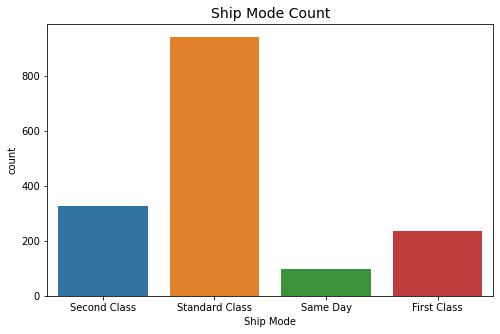

In [126]:
# ship mode count visualization
plt.figure(figsize=[8,5])
sns.countplot(DATA2['Ship Mode'])
plt.title("Ship Mode Count", fontsize=14)
plt.show()

STANDARD CLASS WAS MOST FAVOURED MODE OF SHIPPING

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


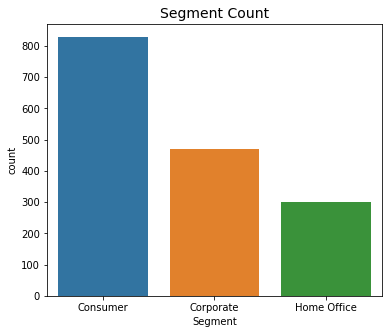

In [127]:
# segment count visualization
plt.figure(figsize=[6,5])
sns.countplot(DATA2['Segment'])
plt.title("Segment Count", fontsize=14)
plt.show()

MOST OF THE SALES CAME BY CONSUMERS

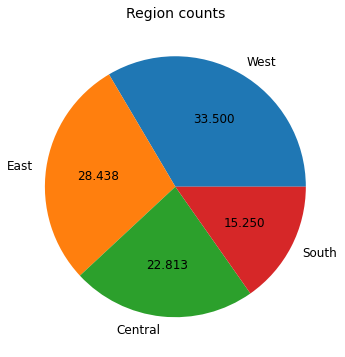

In [128]:
# pie chat for 'region'
plt.figure(figsize=[6, 6])
plt.pie(DATA2['Region'].value_counts(normalize=True), labels= DATA2['Region'].value_counts().index, autopct="%.3f", textprops={'color': 'Black', 'fontsize': 12})
plt.title("Region counts", fontsize=14,color='Black')
plt.show()

MOST EXCHANGE WAS IN WEST REGION

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


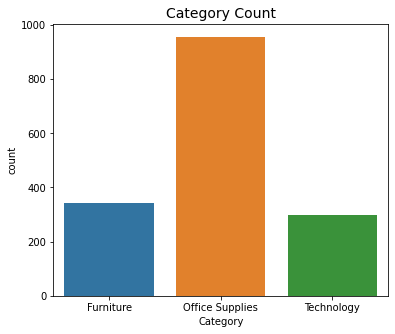

In [129]:
# Category count visualization
plt.figure(figsize=[6,5])
sns.countplot(DATA2['Category'])
plt.title("Category Count", fontsize=14)
plt.show()

MOST PRODUCTS WERE OFFICE SUPPLY CATEGORY

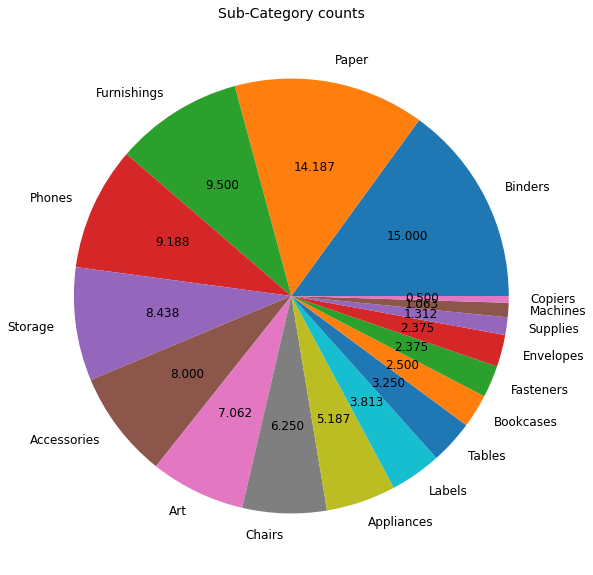

In [130]:
# pie chat for 'sub-category'
plt.figure(figsize=[10, 10])
plt.pie(DATA2['Sub-Category'].value_counts(normalize=True)*100, labels= DATA2['Sub-Category'].value_counts().index, autopct="%.3f", textprops={'color': 'Black', 'fontsize': 12})
plt.title("Sub-Category counts", fontsize=14,color='Black')
plt.show()

HIGHEST SUB CATEGORY - BLINDERS 

## BY AMAAN

In [131]:
DATA3=pd.DataFrame()
DATA3=sales[3200:4800]
DATA3.shape
DATA3.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
3200,3201,CA-2015-164224,2015-05-18,2015-05-20,Second Class,TT-21070,Ted Trevino,Consumer,United States,Akron,Ohio,44312.0,East,FUR-FU-10000308,Furniture,Furnishings,Deflect-o Glass Clear Studded Chair Mats,149.232
3201,3202,CA-2015-164224,2015-05-18,2015-05-20,Second Class,TT-21070,Ted Trevino,Consumer,United States,Akron,Ohio,44312.0,East,OFF-PA-10001526,Office Supplies,Paper,Xerox 1949,15.936
3202,3203,CA-2015-158372,2015-11-10,2015-11-16,Standard Class,RD-19900,Ruben Dartt,Consumer,United States,San Diego,California,92037.0,West,TEC-PH-10002103,Technology,Phones,Jabra SPEAK 410,601.536
3203,3204,CA-2015-158372,2015-11-10,2015-11-16,Standard Class,RD-19900,Ruben Dartt,Consumer,United States,San Diego,California,92037.0,West,TEC-AC-10004209,Technology,Accessories,Memorex Froggy Flash Drive 4 GB,10.990
3204,3205,CA-2015-158372,2015-11-10,2015-11-16,Standard Class,RD-19900,Ruben Dartt,Consumer,United States,San Diego,California,92037.0,West,FUR-FU-10000397,Furniture,Furnishings,Luxo Economy Swing Arm Lamp,39.880


### Most Valuable Customers

get the top 20 customers who has generated max revenue/profit for the company.

In [132]:
top_customers = DATA3.groupby(by=['Customer Name']).sum().round(2)
top_customers = top_customers.sort_values('Sales', ascending=False).head(20)

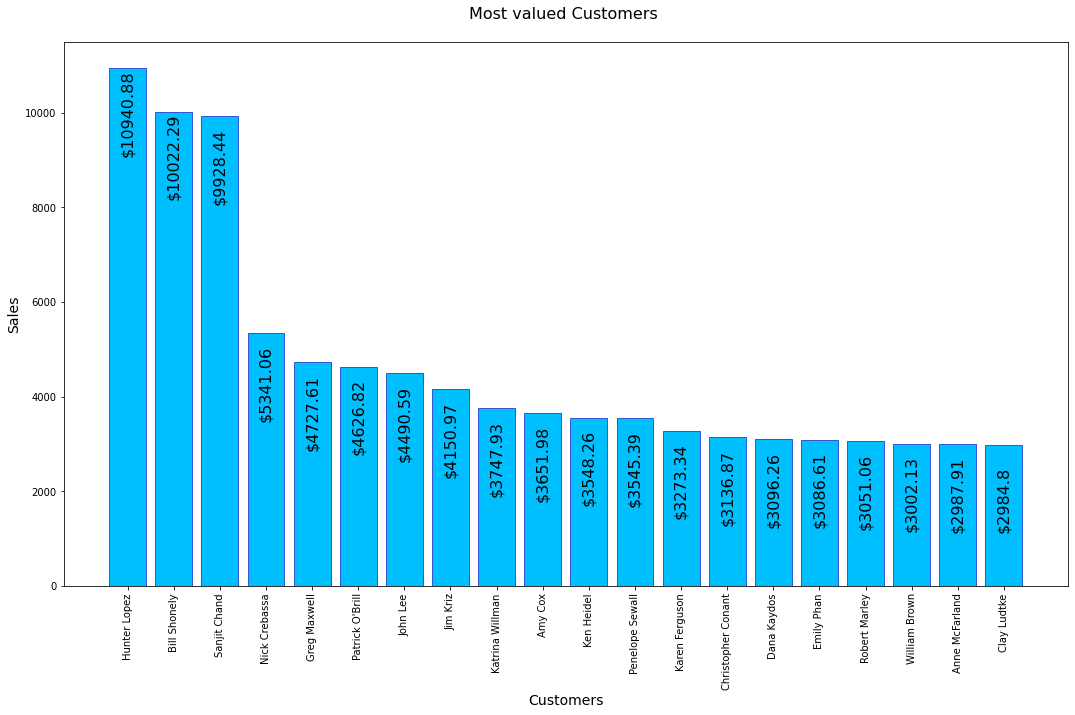

In [133]:
# plot bar of the top valued customers
plt.figure(figsize=[18,10])
plt.bar(top_customers.index, top_customers.Sales, color='#00BFFF', edgecolor='#3457D5')
plt.xticks(rotation=90)
plt.title("Most valued Customers \n", fontsize=16)
plt.xlabel('Customers', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in enumerate(top_customers.Sales):
    plt.text(i, v-1800, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    
plt.show()

HUNTER LOPEZ WAS THE MOST VALUABLE CUSTOMER FOR DATA3

### Top Revenue Generated Cites

Let's get the top Revenue generating cites for the company.

In [134]:
top_cities = DATA3.groupby(by=['City']).sum().round(2)
top_cities = top_cities.sort_values('Sales', ascending=False).head(20)

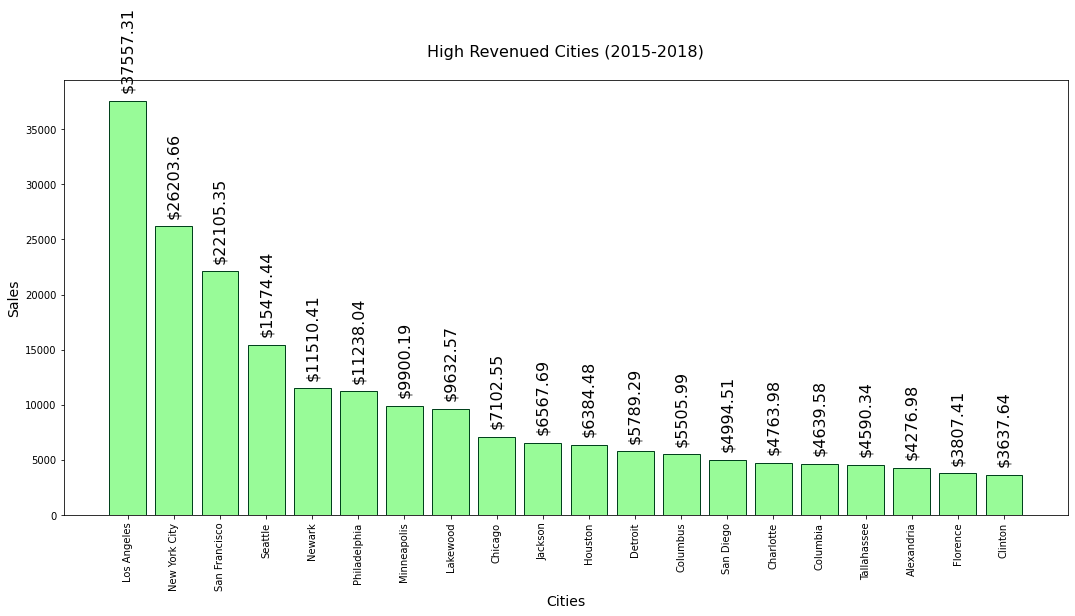

In [135]:
# plot bar of the top revenue generated Cities
plt.figure(figsize=[18,8])
plt.bar(top_cities.index, top_cities.Sales, color='#98FB98', edgecolor='#01411C')
plt.xticks(rotation=90)
plt.title("High Revenued Cities (2015-2018)\n", fontsize=16)
plt.xlabel('Cities', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in top_cities.Sales.items():
    if v>40000:
        plt.text(i, v-8500, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+1000, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    
plt.show()

LOS ANGELES GENERATED HIGHEST REVENUE IN DATA3

### Top Revenue Generated States

let's get the top Revenue generated states for the company

In [136]:
top_states = DATA3.groupby(by=['State']).sum().round(2)
top_states = top_states.sort_values('Sales', ascending=False).head(20)

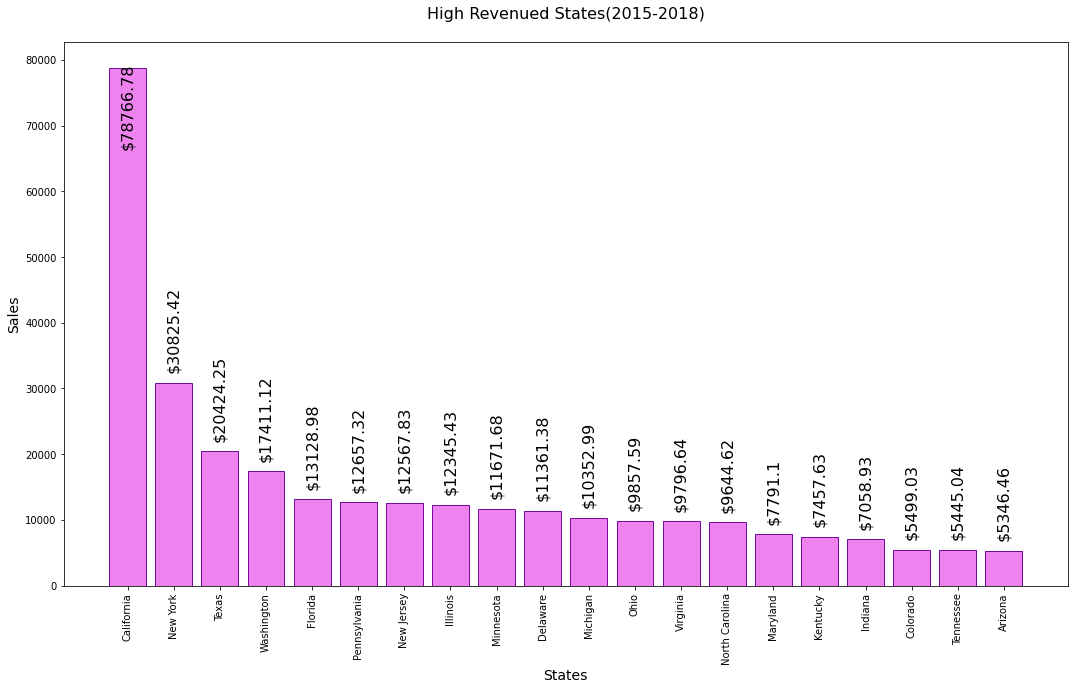

In [137]:
# plot bar of the top revenue generated States
plt.figure(figsize=[18,10])
plt.bar(top_states.index, top_states.Sales, color='#EE82EE', edgecolor='#720e9e')
plt.xticks(rotation=90)
plt.title("High Revenued States(2015-2018)\n", fontsize=16)
plt.xlabel('States', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in top_states.Sales.items():
    if v>50000:
        plt.text(i, v-12000, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+2000, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    
plt.show()

CALIFORNIA GENERATED HIGHEST REVENUE IN DATA3

### Top Products that has generated more sales.

Let's analyze the Top Products for the company.

In [138]:
top_products = DATA3.groupby(by=['Product Name']).sum().round(2)
top_products = top_products.sort_values('Sales', ascending=False).head(20)

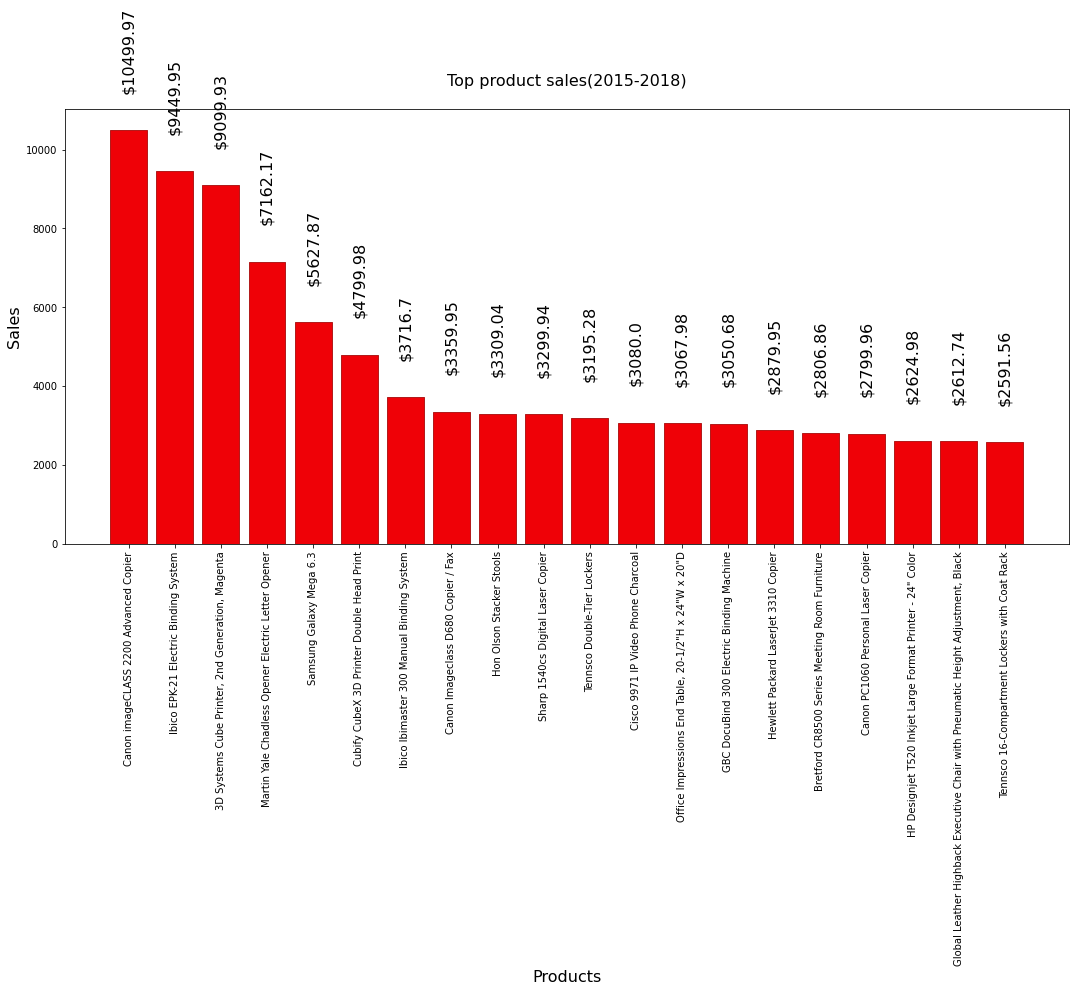

In [139]:
# plot bar of the top Products with highest sales
plt.figure(figsize=[18,8])
plt.bar(top_products.index, top_products.Sales, color='#EF0107', edgecolor='#B31B1B')
plt.xticks(rotation=90)
plt.title("Top product sales(2015-2018)\n", fontsize=16)
plt.xlabel('Products', fontsize=16)
plt.ylabel('Sales', fontsize=16)

for i, v in top_products.Sales.items():
    if v>12000:
        plt.text(i, v-5000, s='$'+str(v), color='black', fontsize=16 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+1000, s='$'+str(v), color='black', fontsize=16 ,rotation=90, horizontalalignment='center')
    
plt.show()

Canon imageCLASS 2200 Advanced Copier was most sold product.

### Get the column analysis wrt count and sales data.

In [140]:
# columns that have less than 20 unique values
cat_cols_dic = {}
for i in range(len(DATA3.nunique())):
    if DATA3.nunique().values[i]<=20:
        cat_cols_dic[DATA3.nunique().index[i]] = DATA3.nunique().values[i]

print(cat_cols_dic)

{'Ship Mode': 4, 'Segment': 3, 'Country': 1, 'Region': 4, 'Category': 3, 'Sub-Category': 17}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


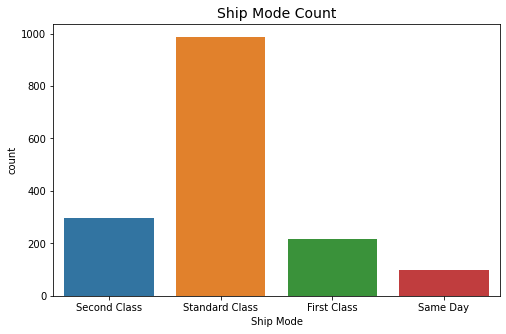

In [141]:
# ship mode count visualization
plt.figure(figsize=[8,5])
sns.countplot(DATA3['Ship Mode'])
plt.title("Ship Mode Count", fontsize=14)
plt.show()

Standard class was most favoured mode of shipping

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


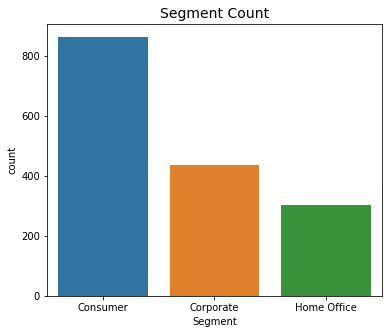

In [142]:
# segment count visualization
plt.figure(figsize=[6,5])
sns.countplot(DATA3['Segment'])
plt.title("Segment Count", fontsize=14)
plt.show()

Most of the sales came from consumers

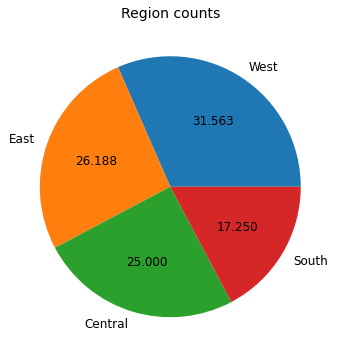

In [143]:
# pie chat for 'region'
plt.figure(figsize=[6, 6])
plt.pie(DATA3['Region'].value_counts(normalize=True), labels= DATA3['Region'].value_counts().index, autopct="%.3f", textprops={'color': 'Black', 'fontsize': 12})
plt.title("Region counts", fontsize=14,color='Black')
plt.show()

Most exchange was done in WEST region

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


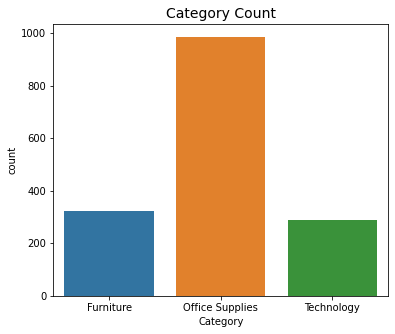

In [144]:
# Category count visualization
plt.figure(figsize=[6,5])
sns.countplot(DATA3['Category'])
plt.title("Category Count", fontsize=14)
plt.show()

Most products were from Office Supplies Category

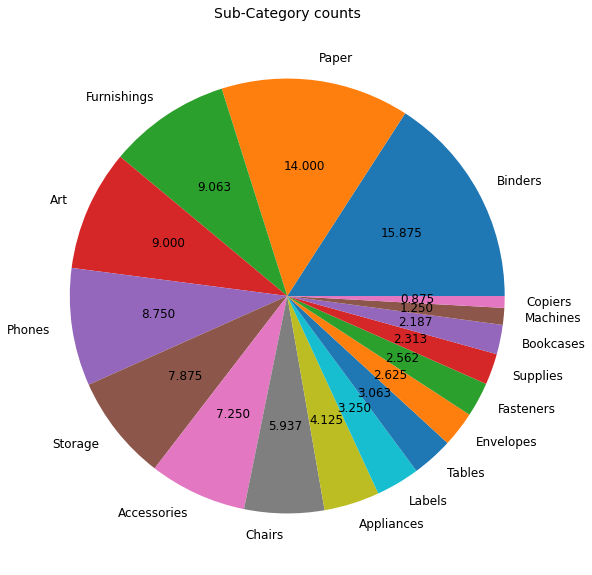

In [145]:
# pie chat for 'sub-category'
plt.figure(figsize=[10, 10])
plt.pie(DATA3['Sub-Category'].value_counts(normalize=True)*100, labels= DATA3['Sub-Category'].value_counts().index, autopct="%.3f", textprops={'color': 'Black', 'fontsize': 12})
plt.title("Sub-Category counts", fontsize=14,color='Black')
plt.show()

Highest sub category count was Blinders

## BY ZUBIN

In [146]:
DATA4=pd.DataFrame()
DATA4=sales[4800:6400]
DATA4.shape

(1600, 18)

### Most Valuable Customers

Get the top 20 customers who has generated max revenue/profit for the company.

In [147]:
top_customers = DATA4.groupby(by=['Customer Name']).sum().round(2)
top_customers = top_customers.sort_values('Sales', ascending=False).head(20)

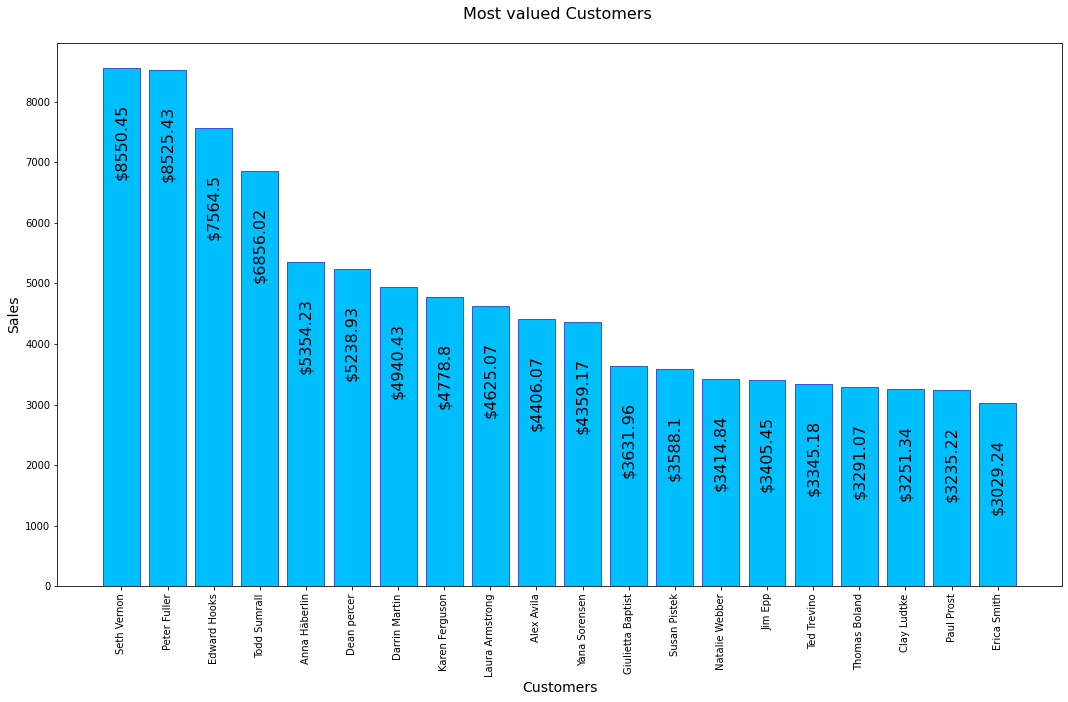

In [148]:
# plot bar of the top valued customers
plt.figure(figsize=[18,10])
plt.bar(top_customers.index, top_customers.Sales, color='#00BFFF', edgecolor='#3457D5')
plt.xticks(rotation=90)
plt.title("Most valued Customers \n", fontsize=16)
plt.xlabel('Customers', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in enumerate(top_customers.Sales):
    plt.text(i, v-1800, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    
plt.show()

SETH VEMON WAS THE MOST VALUABLE CUSTOMER FOR DATA 4

### Top Revenue Generated Cities

Lets get the top revenue generating cities for the company 

In [149]:
top_cities = DATA4.groupby(by=['City']).sum().round(2)
top_cities = top_cities.sort_values('Sales', ascending=False).head(20)

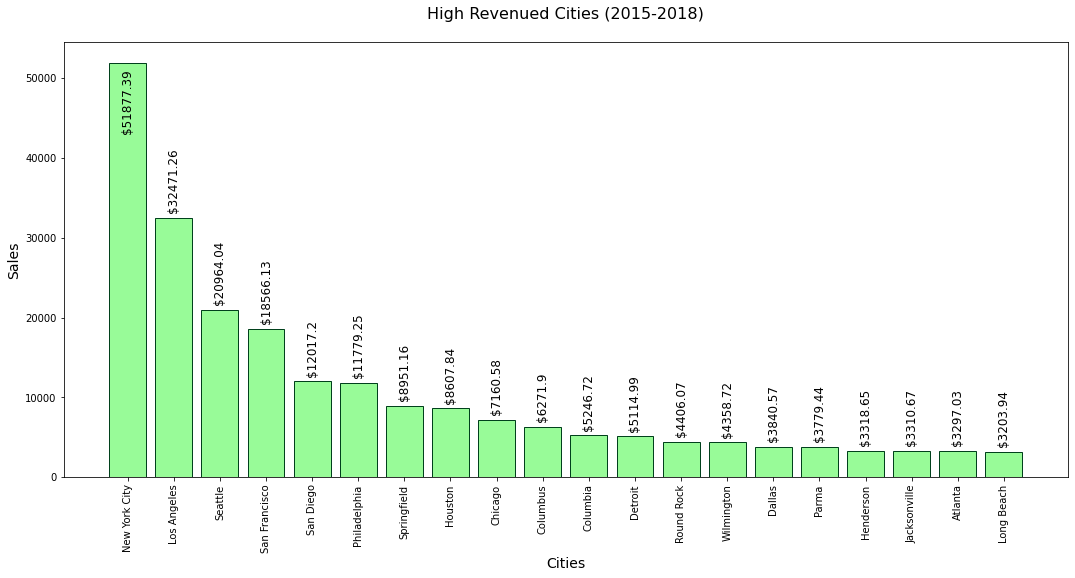

In [150]:
# plot bar of the top revenue generated Cities
plt.figure(figsize=[18,8])
plt.bar(top_cities.index, top_cities.Sales, color='#98FB98', edgecolor='#01411C')
plt.xticks(rotation=90)
plt.title("High Revenued Cities (2015-2018)\n", fontsize=16)
plt.xlabel('Cities', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in top_cities.Sales.items():
    if v>40000:
        plt.text(i, v-8500, s='$'+str(v), color='k', fontsize=12 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+1000, s='$'+str(v), color='k', fontsize=12,rotation=90, horizontalalignment='center')
    
plt.show()

NEW YORK CITY GENERATED THE HIGHEST REVENUE IN DATA 4

### Top Revenue Generated States

Let's get the top revenue generated states for the company

In [151]:
top_states = DATA4.groupby(by=['State']).sum().round(2)
top_states = top_states.sort_values('Sales', ascending=False).head(20)

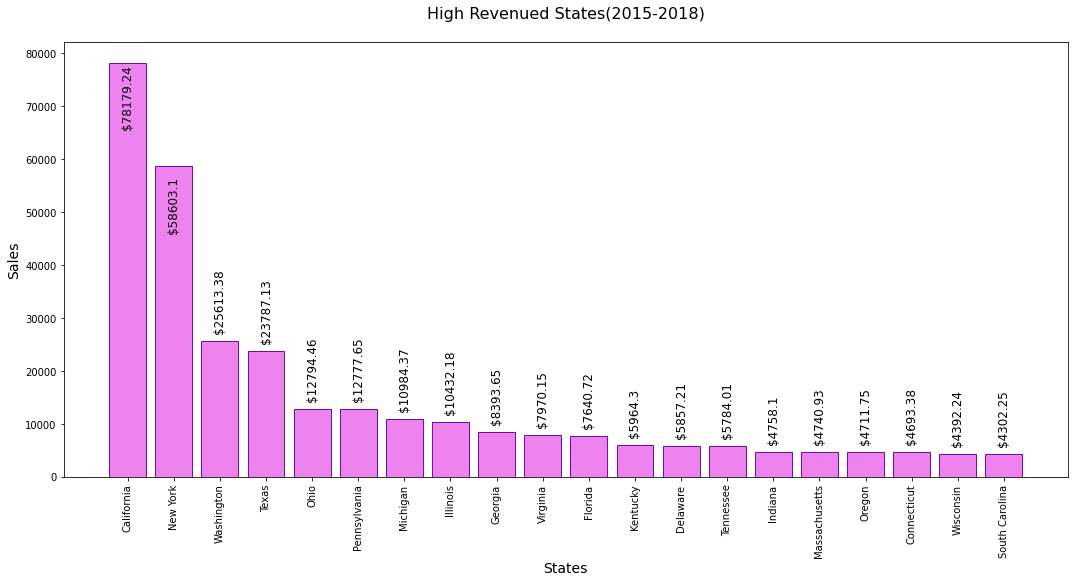

In [152]:
# plot bar of the top revenue generated States
plt.figure(figsize=[18,8])
plt.bar(top_states.index, top_states.Sales, color='#EE82EE', edgecolor='#720e9e')
plt.xticks(rotation=90)
plt.title("High Revenued States(2015-2018)\n", fontsize=16)
plt.xlabel('States', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in top_states.Sales.items():
    if v>50000:
        plt.text(i, v-12000, s='$'+str(v), color='k', fontsize=12 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+2000, s='$'+str(v), color='k', fontsize=12 ,rotation=90, horizontalalignment='center')
    
plt.show()

CALIFORNIA GENERATED HIGHEST REVENUE IN DATA 4

### Top Products that has genrated more Sales

Let's analyse the top products for the company 

In [153]:
top_products = DATA4.groupby(by=['Product Name']).sum().round(2)
top_products = top_products.sort_values('Sales', ascending=False).head(20)

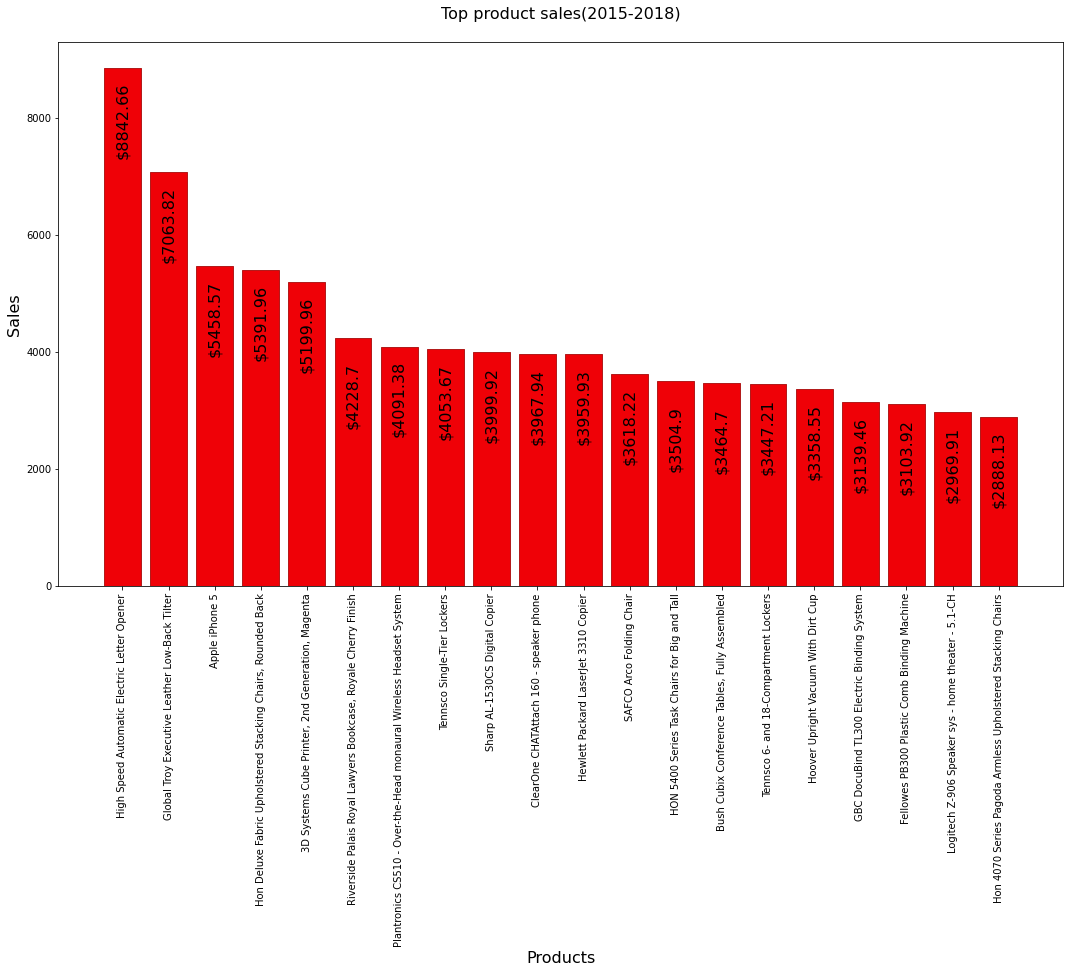

In [154]:
# plot bar of the top Products with highest sales
plt.figure(figsize=[18,10])
plt.bar(top_products.index, top_products.Sales, color='#EF0107', edgecolor='#B31B1B')
plt.xticks(rotation=90)
plt.title("Top product sales(2015-2018)\n", fontsize=16)
plt.xlabel('Products', fontsize=16)
plt.ylabel('Sales', fontsize=16)

for i, v in top_products.Sales.items():
    if v>12000:
        plt.text(i, v-5000, s='$'+str(v), color='black', fontsize=16 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v-1500, s='$'+str(v), color='black', fontsize=16 ,rotation=90, horizontalalignment='center')
    
plt.show()

HIGH SPEED AUTOMATIC ELECTRIC LETTER OPENER IS THE TOP PRODUCT WITH THE HIGHEST SALES IN DATA 4

  ### Get the Column Analysis wrt count and sales data 

In [155]:
# columns that have less than 20 unique values
cat_cols_dic = {}
for i in range(len(DATA4.nunique())):
    if DATA4.nunique().values[i]<=20:
        cat_cols_dic[DATA4.nunique().index[i]] = DATA4.nunique().values[i]

print(cat_cols_dic)

{'Ship Mode': 4, 'Segment': 3, 'Country': 1, 'Region': 4, 'Category': 3, 'Sub-Category': 17}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


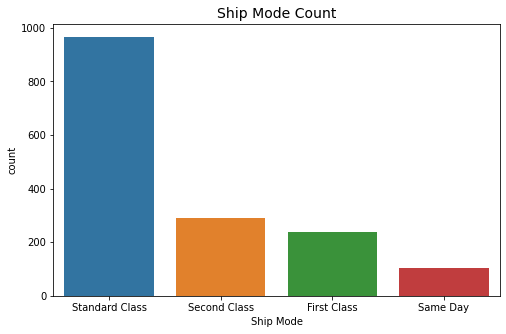

In [156]:
# ship mode count visualization
plt.figure(figsize=[8,5])
sns.countplot(DATA4['Ship Mode'])
plt.title("Ship Mode Count", fontsize=14)
plt.show()

Standard Class was the most preferred for shipping

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


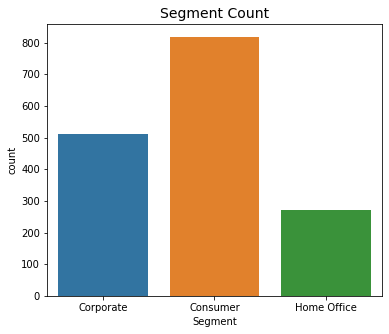

In [157]:
# segment count visualization
plt.figure(figsize=[6,5])
sns.countplot(DATA4['Segment'])
plt.title("Segment Count", fontsize=14)
plt.show()

Most of the sales came from the Consumer segment 

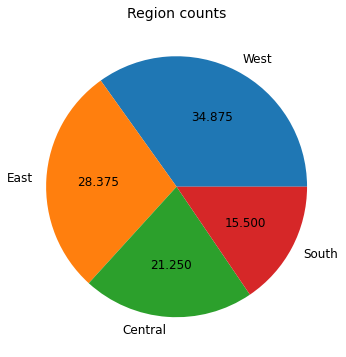

In [158]:
# pie chat for 'region'
plt.figure(figsize=[6, 6])
plt.pie(DATA4['Region'].value_counts(normalize=True), labels= DATA4['Region'].value_counts().index, autopct="%.3f", textprops={'color': 'Black', 'fontsize': 12})
plt.title("Region counts", fontsize=14,color='Black')
plt.show()

Most sales came from the west region 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


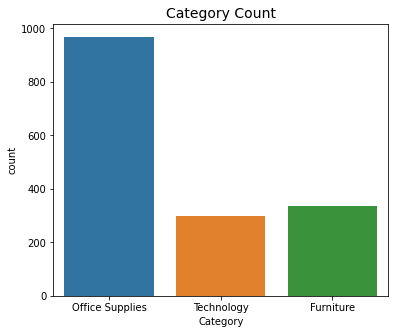

In [159]:
# Category count visualization
plt.figure(figsize=[6,5])
sns.countplot(DATA4['Category'])
plt.title("Category Count", fontsize=14)
plt.show()

Most supplies were part of the 'Office Supplies' Category 

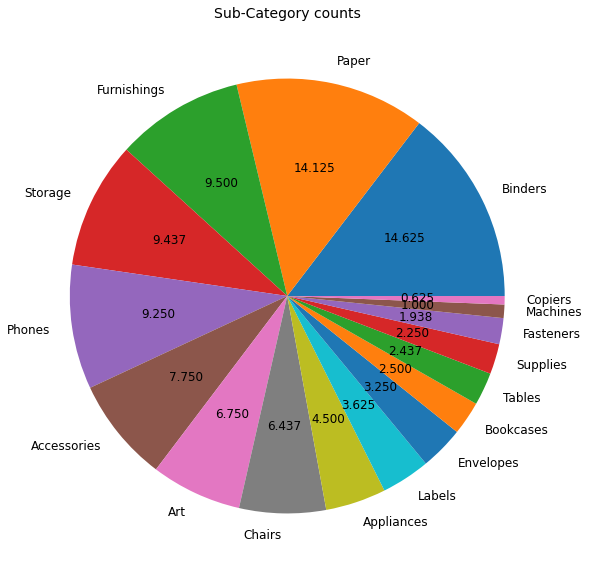

In [160]:
# pie chat for 'sub-category'
plt.figure(figsize=[10, 10])
plt.pie(DATA4['Sub-Category'].value_counts(normalize=True)*100, labels= DATA4['Sub-Category'].value_counts().index, autopct="%.3f", textprops={'color': 'Black', 'fontsize': 12})
plt.title("Sub-Category counts", fontsize=14,color='Black')
plt.show()

Highest sub Category was Blinders

## BY VASU

In [161]:
DATA5=pd.DataFrame()
DATA5=sales[6400:8000]
DATA5.shape

(1600, 18)

### Most Valuable Customers

get the top 20 customers who has generated max revenue/profit for the company.

In [162]:
top_customers = DATA5.groupby(by=['Customer Name']).sum().round(2)
top_customers = top_customers.sort_values('Sales', ascending=False).head(20)

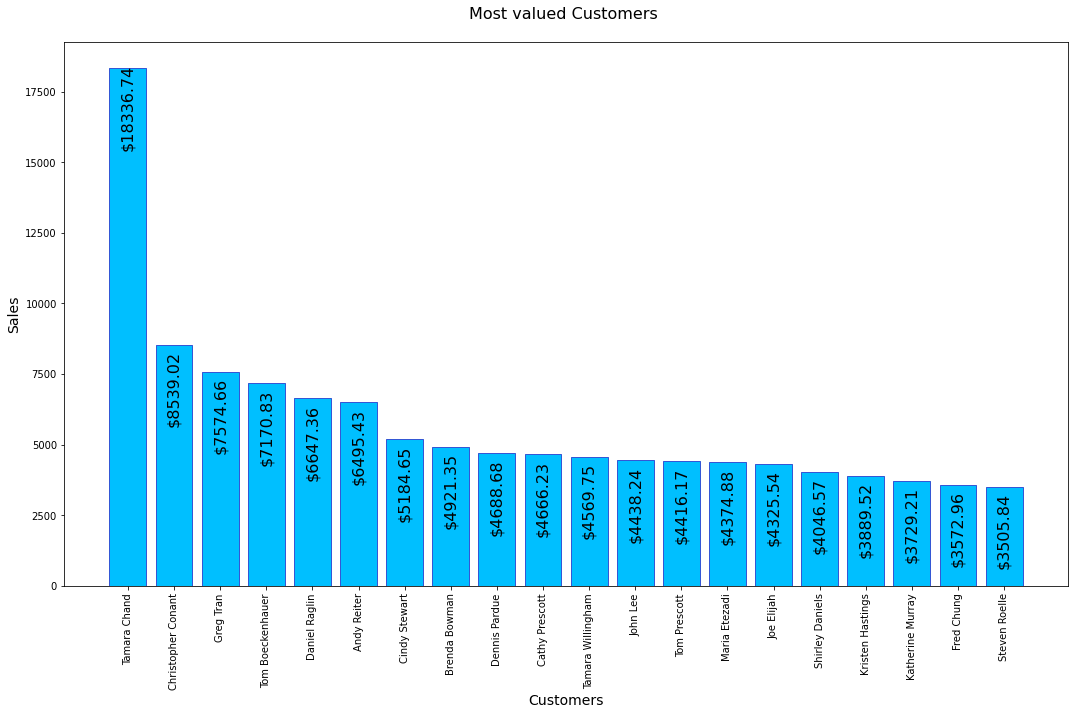

In [163]:
# plot bar of the top valued customers
plt.figure(figsize=[18,10])
plt.bar(top_customers.index, top_customers.Sales, color='#00BFFF', edgecolor='#3457D5')
plt.xticks(rotation=90)
plt.title("Most valued Customers \n", fontsize=16)
plt.xlabel('Customers', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in enumerate(top_customers.Sales):
    plt.text(i, v-2800, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    
plt.show()

TAMARA CHAND WAS THE MOST VALUABLE CUSTOMER FOR DATA5

### Top Revenue Generated Cites

Let's get the top Revenue generating cites for the company.

In [164]:
top_cities = DATA5.groupby(by=['City']).sum().round(2)
top_cities = top_cities.sort_values('Sales', ascending=False).head(20)

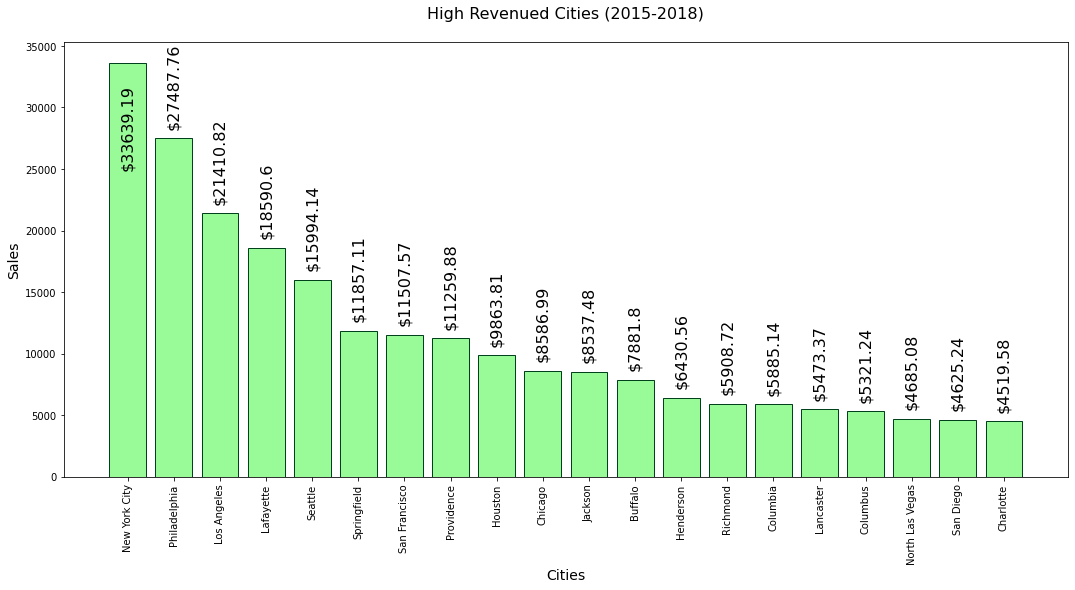

In [165]:
# plot bar of the top revenue generated Cities
plt.figure(figsize=[18,8])
plt.bar(top_cities.index, top_cities.Sales, color='#98FB98', edgecolor='#01411C')
plt.xticks(rotation=90)
plt.title("High Revenued Cities (2015-2018)\n", fontsize=16)
plt.xlabel('Cities', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in top_cities.Sales.items():
    if v>30000:
        plt.text(i, v-8500, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+1000, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    
plt.show()

NEW YORK GENERATED HIGHEST REVENUE IN DATA5

### Top Revenue Generated States

let's get the top Revenue generated states for the company

In [166]:
top_states = DATA5.groupby(by=['State']).sum().round(2)
top_states = top_states.sort_values('Sales', ascending=False).head(20)

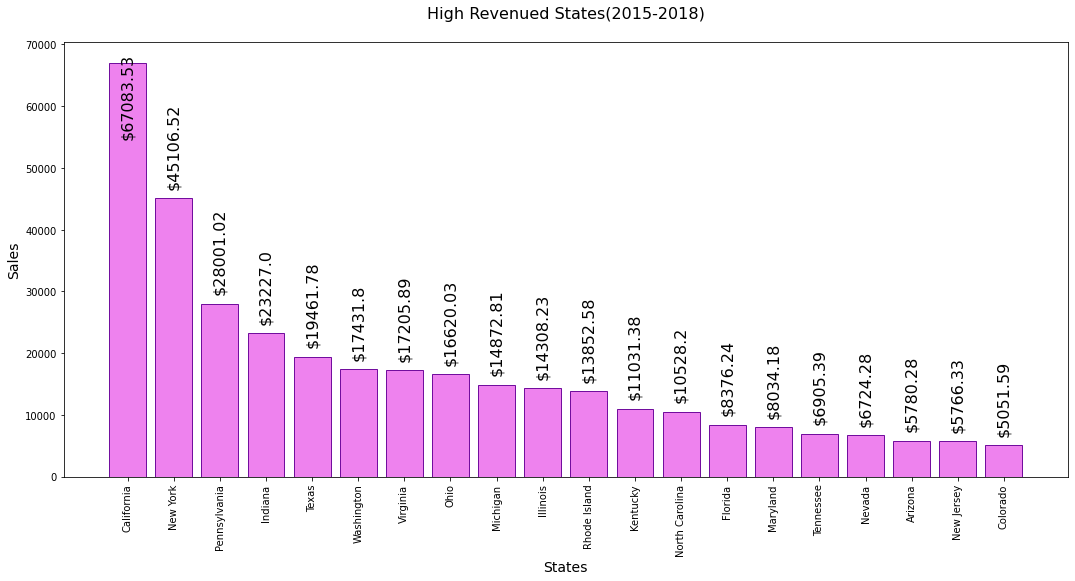

In [167]:
# plot bar of the top revenue generated States
plt.figure(figsize=[18,8])
plt.bar(top_states.index, top_states.Sales, color='#EE82EE', edgecolor='#720e9e')
plt.xticks(rotation=90)
plt.title("High Revenued States(2015-2018)\n", fontsize=16)
plt.xlabel('States', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in top_states.Sales.items():
    if v>50000:
        plt.text(i, v-12000, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+2000, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    
plt.show()

CALIFORNIA GENERATED HIGHEST REVENUE IN DATA5

### Top Products that has generated more sales.

Let's analyze the Top Products for the company.

In [168]:
top_products = DATA5.groupby(by=['Product Name']).sum().round(2)
top_products = top_products.sort_values('Sales', ascending=False).head(20)

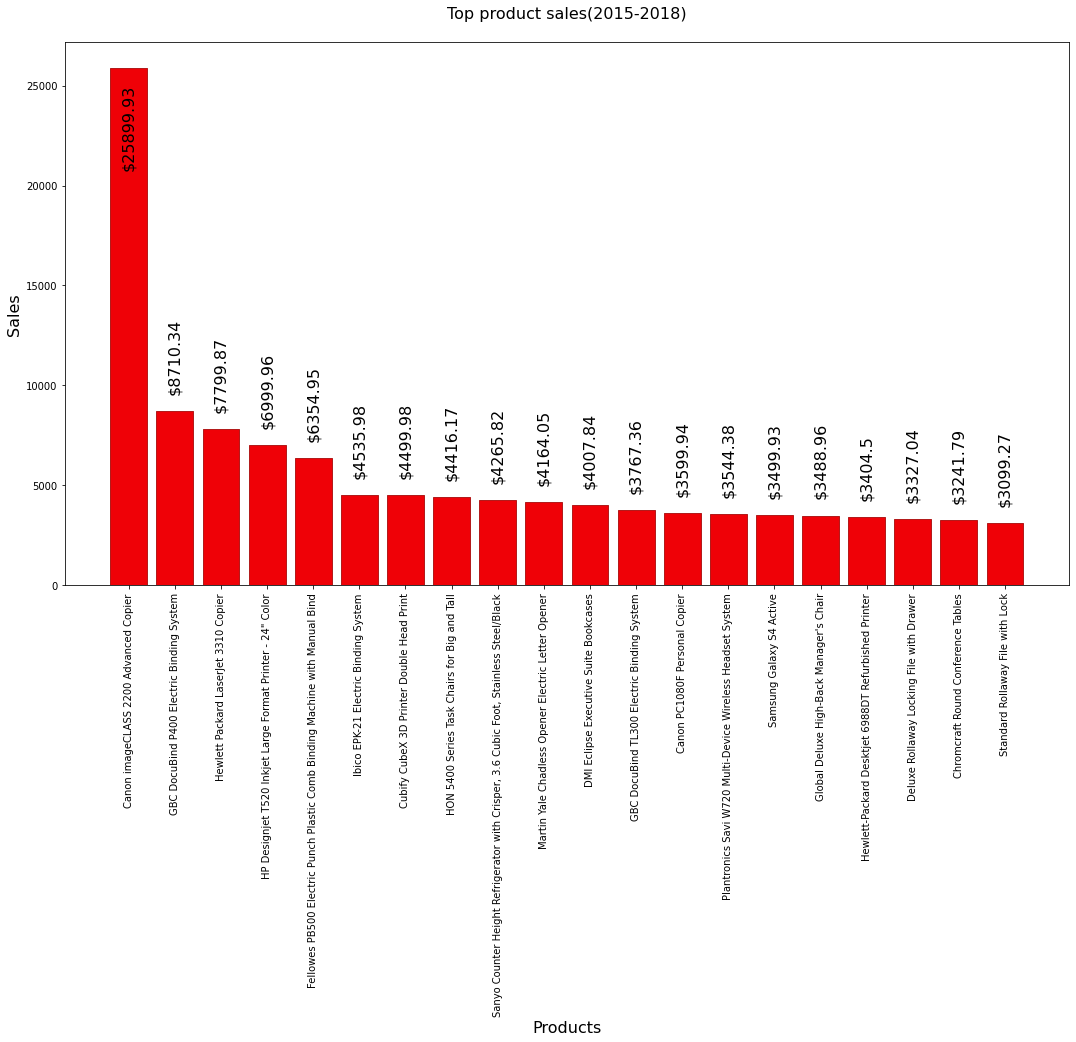

In [169]:
# plot bar of the top Products with highest sales
plt.figure(figsize=[18,10])
plt.bar(top_products.index, top_products.Sales, color='#EF0107', edgecolor='#B31B1B')
plt.xticks(rotation=90)
plt.title("Top product sales(2015-2018)\n", fontsize=16)
plt.xlabel('Products', fontsize=16)
plt.ylabel('Sales', fontsize=16)

for i, v in top_products.Sales.items():
    if v>12000:
        plt.text(i, v-5000, s='$'+str(v), color='black', fontsize=16 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+1000, s='$'+str(v), color='black', fontsize=16 ,rotation=90, horizontalalignment='center')
    
plt.show()

Canon imageCLASS 2200 Advanced copier was most sold product.

### Get the column analysis wrt count and sales data.

In [170]:
# columns that have less than 20 unique values
cat_cols_dic = {}
for i in range(len(DATA5.nunique())):
    if DATA5.nunique().values[i]<=20:
        cat_cols_dic[DATA5.nunique().index[i]] = DATA5.nunique().values[i]

print(cat_cols_dic)

{'Ship Mode': 4, 'Segment': 3, 'Country': 1, 'Region': 4, 'Category': 3, 'Sub-Category': 17}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


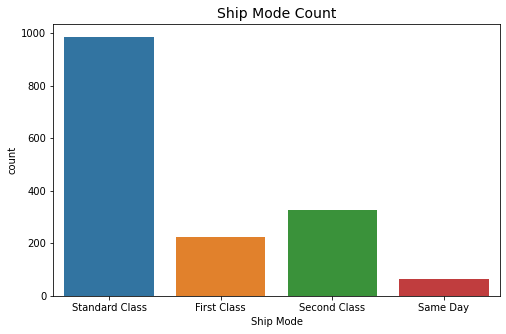

In [171]:
# ship mode count visualization
plt.figure(figsize=[8,5])
sns.countplot(DATA5['Ship Mode'])
plt.title("Ship Mode Count", fontsize=14)
plt.show()

standard class was most favoured mode of shipping

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


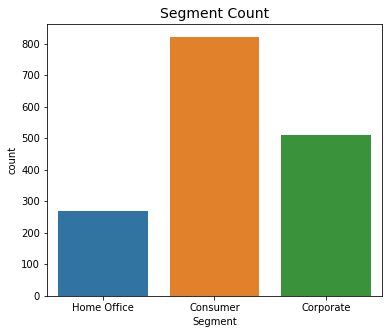

In [172]:
# segment count visualization
plt.figure(figsize=[6,5])
sns.countplot(DATA5['Segment'])
plt.title("Segment Count", fontsize=14)
plt.show()

most of the sales came from consumers

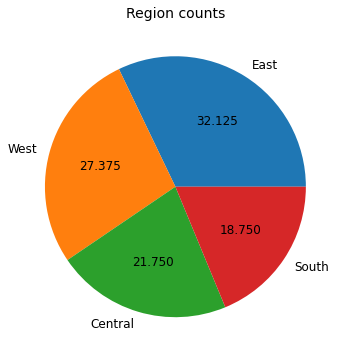

In [173]:
# pie chat for 'region'
plt.figure(figsize=[6, 6])
plt.pie(DATA5['Region'].value_counts(normalize=True), labels= DATA1['Region'].value_counts().index, autopct="%.3f", textprops={'color': 'Black', 'fontsize': 12})
plt.title("Region counts", fontsize=14,color='Black')
plt.show()

Most exchange was done in EAST region

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


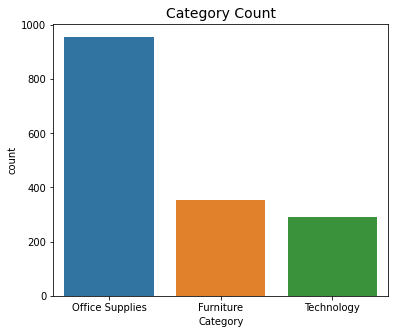

In [174]:
# Category count visualization
plt.figure(figsize=[6,5])
sns.countplot(DATA5['Category'])
plt.title("Category Count", fontsize=14)
plt.show()

Most products were Office Supplies Category

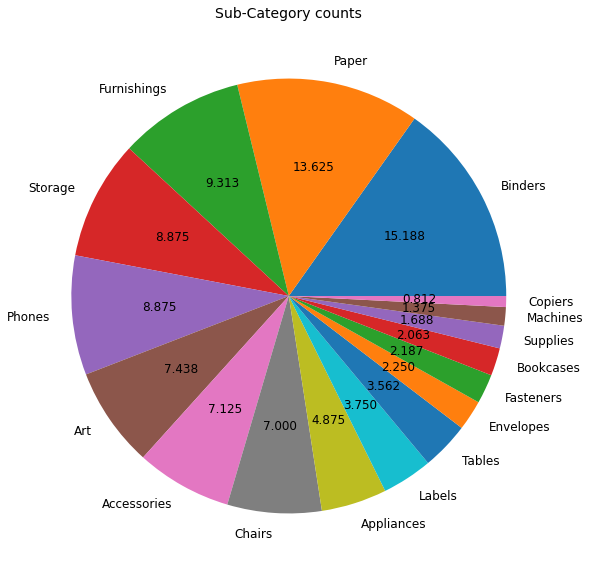

In [175]:
# pie chat for 'sub-category'
plt.figure(figsize=[10, 10])
plt.pie(DATA5['Sub-Category'].value_counts(normalize=True)*100, labels= DATA1['Sub-Category'].value_counts().index, autopct="%.3f", textprops={'color': 'Black', 'fontsize': 12})
plt.title("Sub-Category counts", fontsize=14,color='Black')
plt.show()

Highest sub category count was Blinders

## BY RAHUL

In [176]:
DATA6=pd.DataFrame()
DATA6=sales[8000:9600]
DATA6.shape

(1600, 18)

### Most Valuable Customers

In [177]:
top_customers = DATA6.groupby(by=['Customer Name']).sum().round(2)
top_customers = top_customers.sort_values('Sales', ascending=False).head(20)

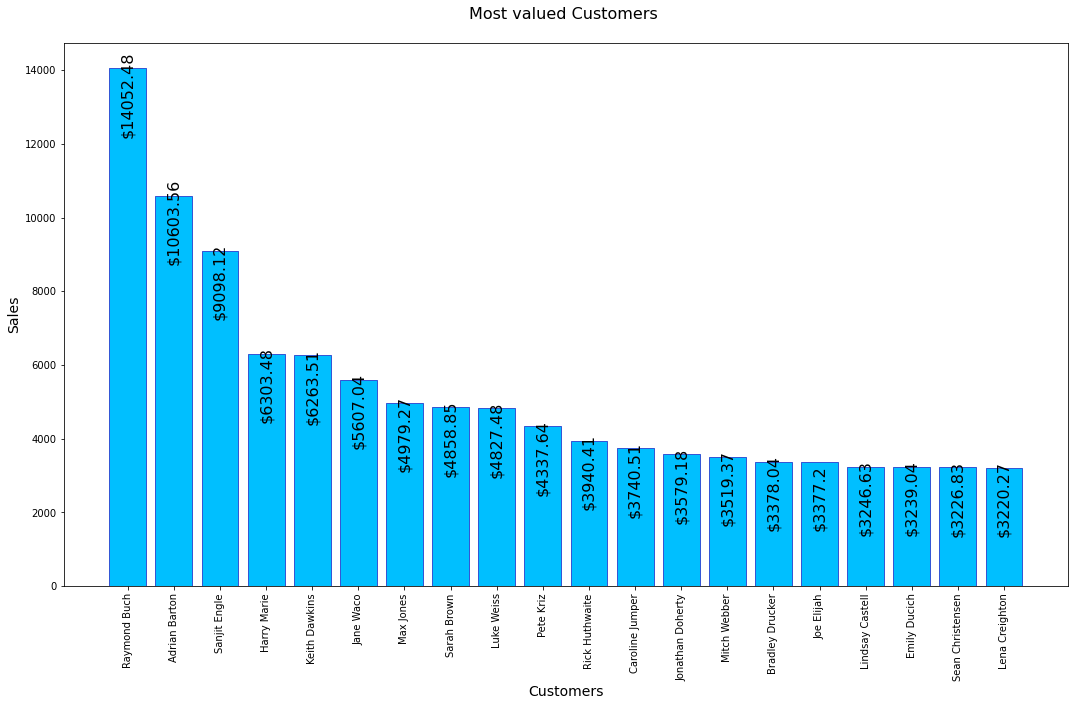

In [178]:
# plot bar of the top valued customers
plt.figure(figsize=[18,10])
plt.bar(top_customers.index, top_customers.Sales, color='#00BFFF', edgecolor='#3457D5')
plt.xticks(rotation=90)
plt.title("Most valued Customers \n", fontsize=16)
plt.xlabel('Customers', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in enumerate(top_customers.Sales):
    plt.text(i, v-1800, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    
plt.show()

RAYMOND BUCH IS THE MOST VALUABLE CUSTOMER FOR DATA 6

### Top Revenue Generated Cites

In [179]:
top_cities = DATA6.groupby(by=['City']).sum().round(2)
top_cities = top_cities.sort_values('Sales', ascending=False).head(20)

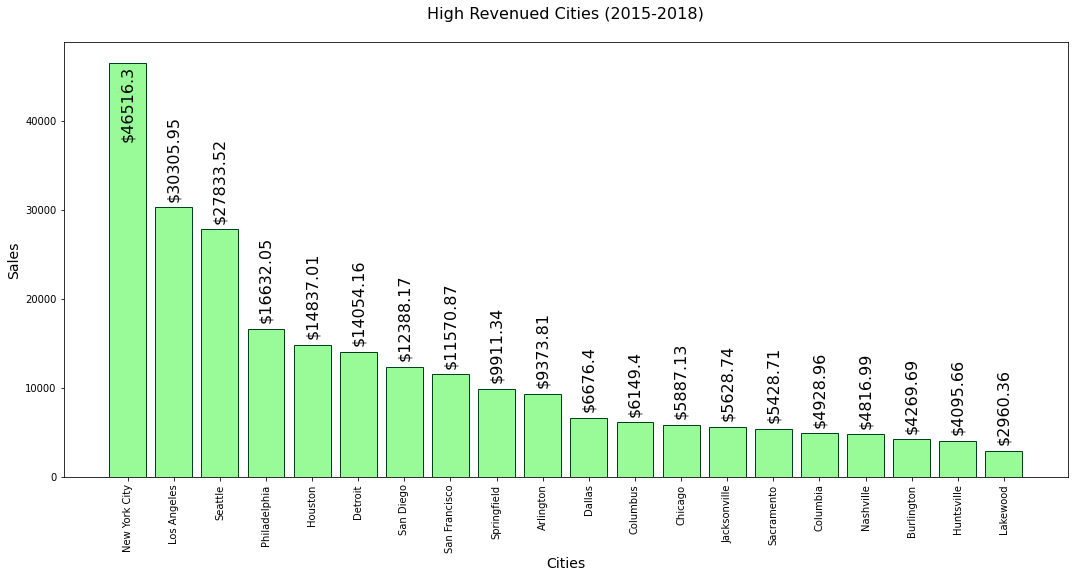

In [180]:
# plot bar of the top revenue generated Cities
plt.figure(figsize=[18,8])
plt.bar(top_cities.index, top_cities.Sales, color='#98FB98', edgecolor='#01411C')
plt.xticks(rotation=90)
plt.title("High Revenued Cities (2015-2018)\n", fontsize=16)
plt.xlabel('Cities', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in top_cities.Sales.items():
    if v>40000:
        plt.text(i, v-8500, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+1000, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    
plt.show()

NEW YORK CITY GENERATED HIGHEST REVENUE IN DATA 6

### Top Revenue Generated States

In [181]:
top_states = DATA6.groupby(by=['State']).sum().round(2)
top_states = top_states.sort_values('Sales', ascending=False).head(20)

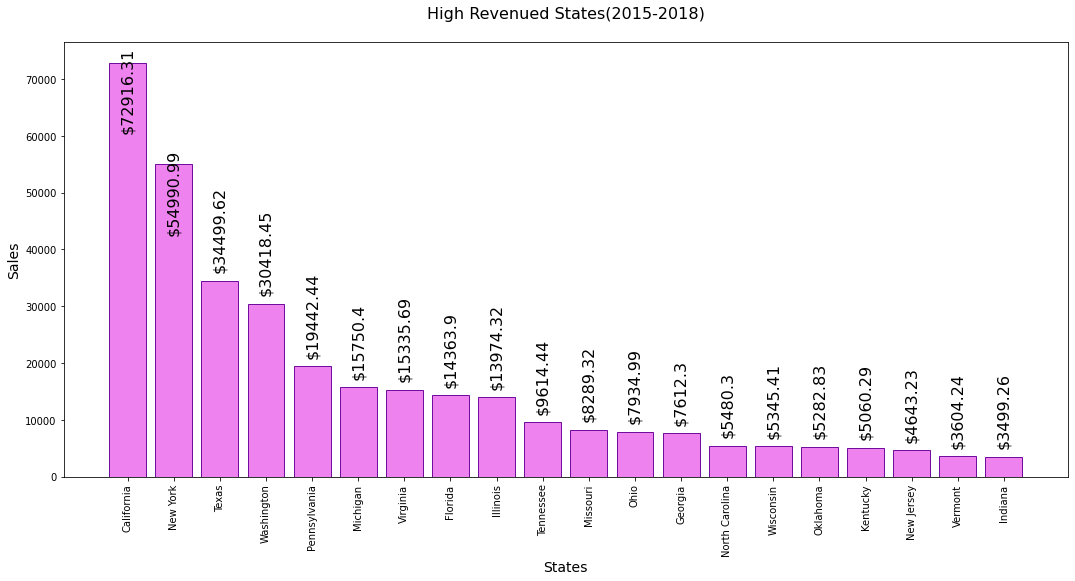

In [182]:
# plot bar of the top revenue generated States
plt.figure(figsize=[18,8])
plt.bar(top_states.index, top_states.Sales, color='#EE82EE', edgecolor='#720e9e')
plt.xticks(rotation=90)
plt.title("High Revenued States(2015-2018)\n", fontsize=16)
plt.xlabel('States', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in top_states.Sales.items():
    if v>50000:
        plt.text(i, v-12000, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+2000, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    
plt.show()

CALIFORNIA GENERATED HIGHEST REVENUE IN DATA6

### Top Products that has generated more sales

In [183]:
top_products = DATA6.groupby(by=['Product Name']).sum().round(2)
top_products = top_products.sort_values('Sales', ascending=False).head(20)

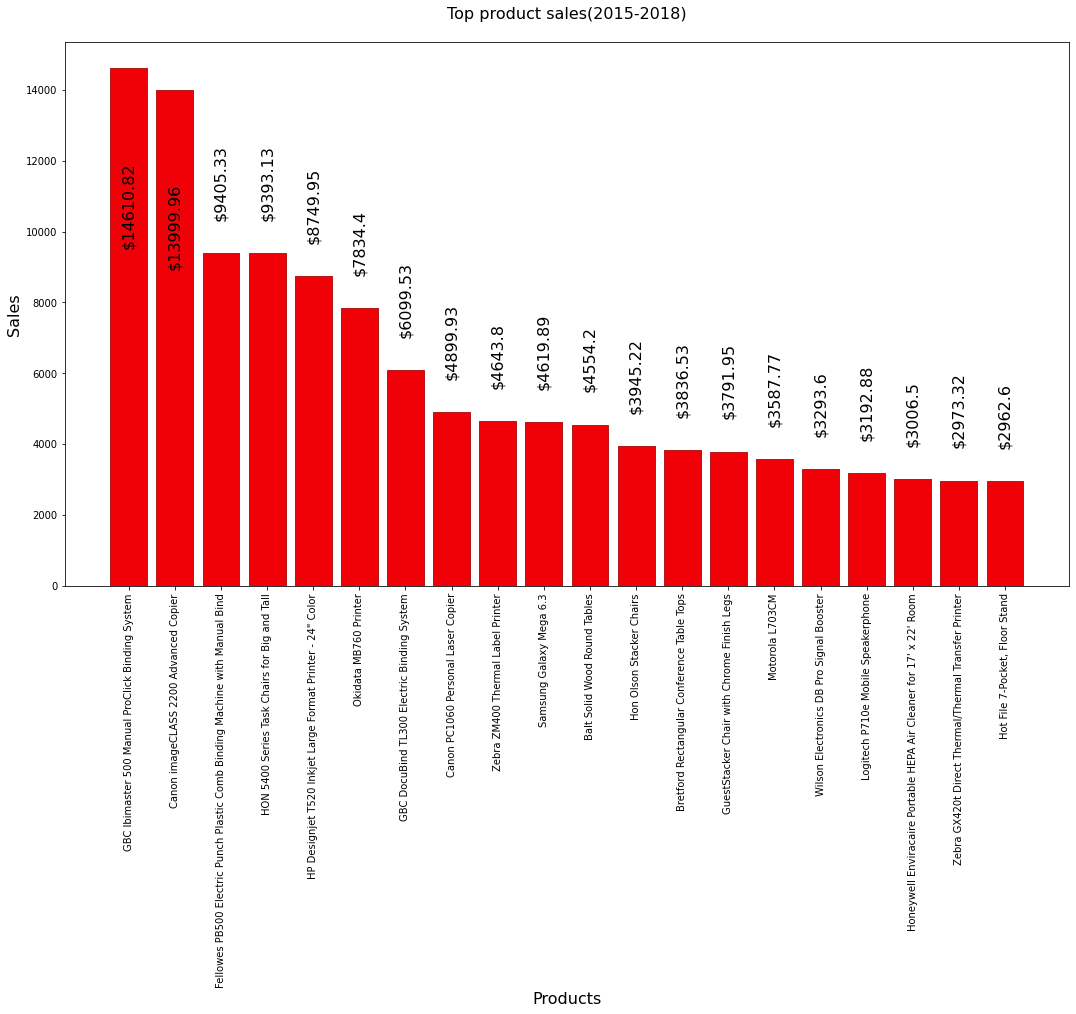

In [184]:
# plot bar of the top Products with highest sales
plt.figure(figsize=[18,10])
plt.bar(top_products.index, top_products.Sales, color='#EF0107', edgecolor='#B31B1B')
plt.xticks(rotation=90)
plt.title("Top product sales(2015-2018)\n", fontsize=16)
plt.xlabel('Products', fontsize=16)
plt.ylabel('Sales', fontsize=16)

for i, v in top_products.Sales.items():
    if v>12000:
        plt.text(i, v-5000, s='$'+str(v), color='black', fontsize=16 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+1000, s='$'+str(v), color='black', fontsize=16 ,rotation=90, horizontalalignment='center')
    
plt.show()

GBC Ibimaster 500 manual ProClick Binding System was the most sold product

### Get the column analysis wrt count and sales data.

In [185]:
# columns that have less than 20 unique values
cat_cols_dic = {}
for i in range(len(DATA6.nunique())):
    if DATA6.nunique().values[i]<=20:
        cat_cols_dic[DATA6.nunique().index[i]] = DATA6.nunique().values[i]

print(cat_cols_dic)

{'Ship Mode': 4, 'Segment': 3, 'Country': 1, 'Region': 4, 'Category': 3, 'Sub-Category': 17}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


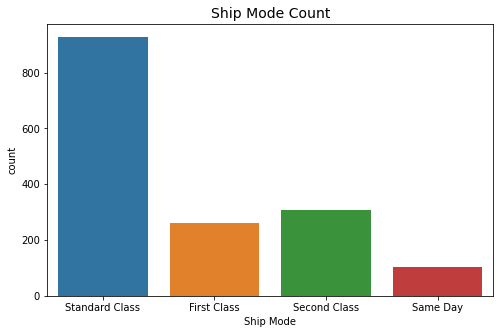

In [186]:
# ship mode count visualization
plt.figure(figsize=[8,5])
sns.countplot(DATA6['Ship Mode'])
plt.title("Ship Mode Count", fontsize=14)
plt.show()

Standard class was most favoured mode of shipping

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


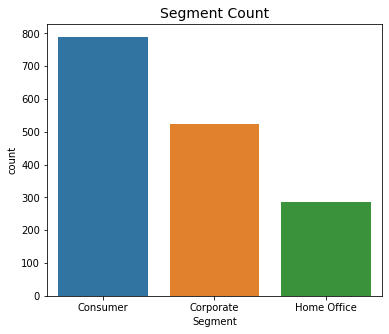

In [187]:
# segment count visualization
plt.figure(figsize=[6,5])
sns.countplot(DATA6['Segment'])
plt.title("Segment Count", fontsize=14)
plt.show()

most of the sales came from consumers

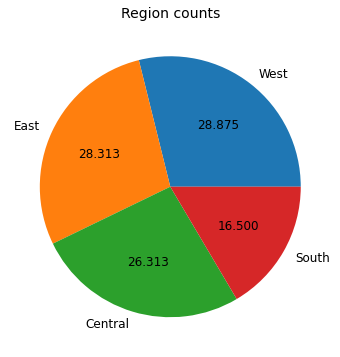

In [188]:
# pie chat for 'region'
plt.figure(figsize=[6, 6])
plt.pie(DATA6['Region'].value_counts(normalize=True), labels= DATA6['Region'].value_counts().index, autopct="%.3f", textprops={'color': 'Black', 'fontsize': 12})
plt.title("Region counts", fontsize=14,color='Black')
plt.show()

Most exchange was done in WEST region

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


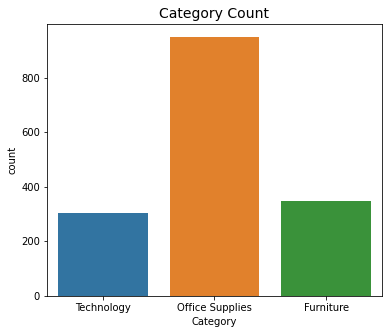

In [189]:
# Category count visualization
plt.figure(figsize=[6,5])
sns.countplot(DATA6['Category'])
plt.title("Category Count", fontsize=14)
plt.show()

Most products were Office Supplies Category

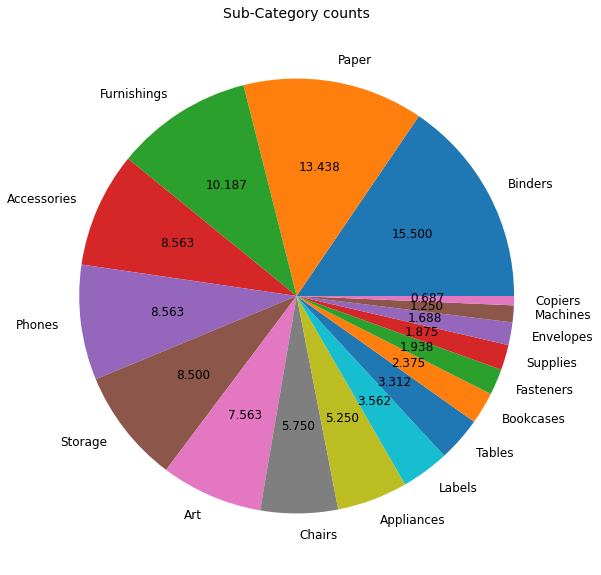

In [190]:
# pie chat for 'sub-category'
plt.figure(figsize=[10, 10])
plt.pie(DATA6['Sub-Category'].value_counts(normalize=True)*100, labels= DATA6['Sub-Category'].value_counts().index, autopct="%.3f", textprops={'color': 'Black', 'fontsize': 12})
plt.title("Sub-Category counts", fontsize=14,color='Black')
plt.show()

Highest sub category count was Blinders

# Cumulative EDA

## Sales over the 4 years

In [191]:
sales['order_year'] = sales['Order Date'].dt.year
sales['order_month'] = sales['Order Date'].dt.month_name()

In [192]:
year_sales = pd.DataFrame(sales.groupby(sales['order_year']).sum()['Sales'].reset_index())
year_sales = year_sales.nlargest(4,'Sales')
year_sales.head(4)

,order_year,Sales
3,2018,722052.0192
2,2017,600192.5500
0,2015,479856.2081
1,2016,459436.0054


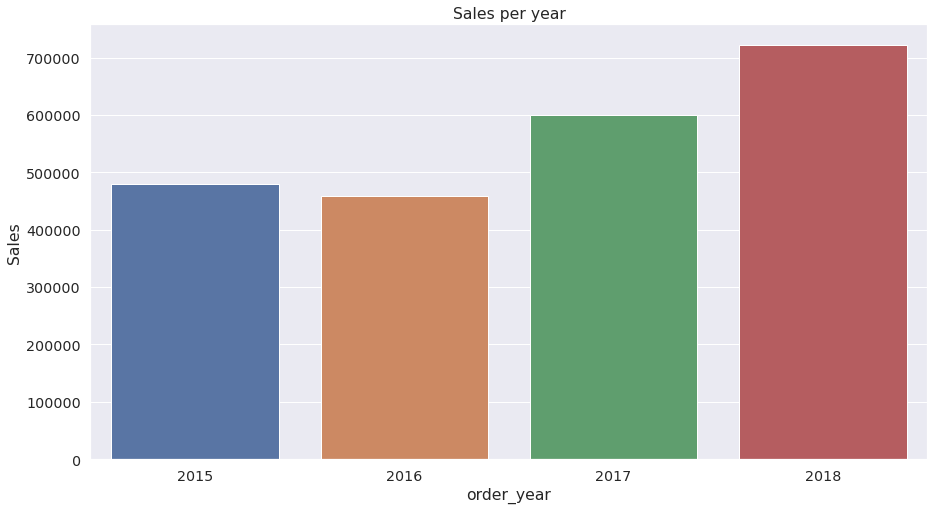

In [193]:
sns.set(font_scale=1.3)
plt.figure(figsize=(15,8))
plt.title('Sales per year')
sns.set_style('darkgrid')
sns.barplot(x='order_year', y='Sales',data = year_sales)
plt.show()

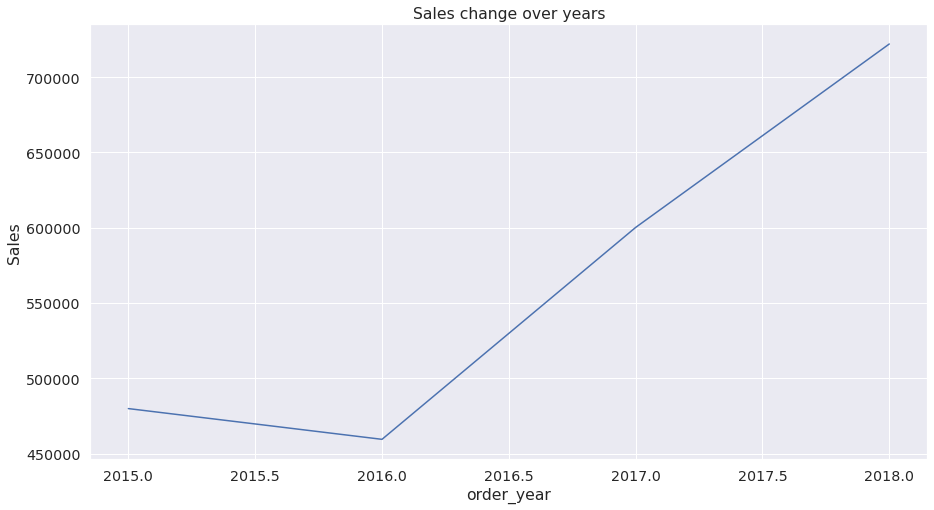

In [194]:
sns.set(font_scale=1.3)
plt.figure(figsize=(15,8))
plt.title('Sales change over years')
sns.set_style('darkgrid')
sns.lineplot(x='order_year', y='Sales',data = year_sales)
plt.show()

In [195]:
month_sales = pd.DataFrame(sales.groupby(sales['order_month']).sum()['Sales'].reset_index())
month_sales = month_sales.nlargest(12,'Sales')
month_sales.head(12)

,order_month,Sales
9,November,350161.7110
2,December,321480.1695
11,September,300103.4117
10,October,199496.2947
7,March,197573.5872
1,August,157315.9270
8,May,154086.7237
6,June,145837.5233
5,July,145535.6890
0,April,136283.0006


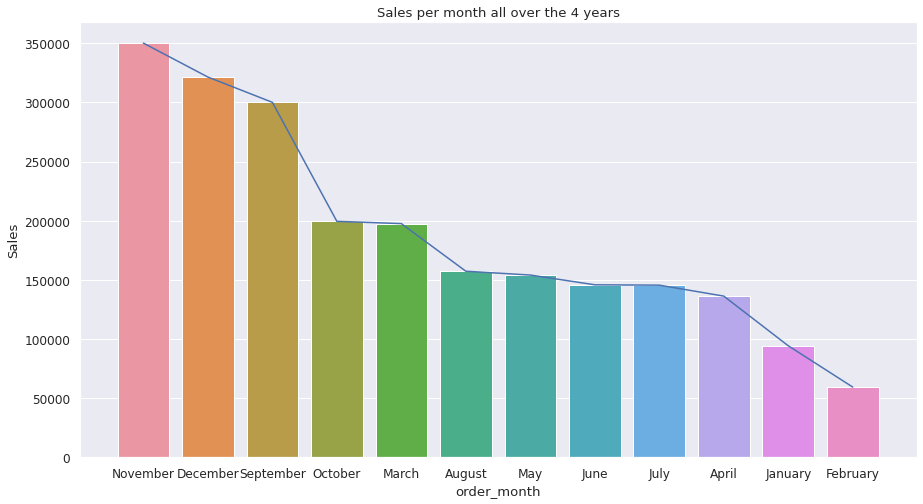

In [196]:
sns.set(font_scale=1.1)
plt.figure(figsize=(15,8))
plt.title('Sales per month all over the 4 years')
sns.set_style('darkgrid')
sns.barplot(x='order_month', y='Sales',data = month_sales)
sns.lineplot(x='order_month', y='Sales',data = month_sales)
plt.show()

Creating a dataframe for each of the 4 years

In [197]:
year_2015 = sales.loc[sales['order_year'] == 2015]
year_2016 = sales.loc[sales['order_year'] == 2016]
year_2017 = sales.loc[sales['order_year'] == 2017]
year_2018 = sales.loc[sales['order_year'] == 2018]

## Change in monthly sales for 2015

In [198]:
monthly_sales_2015 = pd.DataFrame(sales.groupby(year_2015['order_month']).sum()['Sales'].reset_index())
monthly_sales_2015 = monthly_sales_2015.nlargest(12,'Sales')
monthly_sales_2015.head(12)

,order_month,Sales
11,September,81623.5268
9,November,77907.6607
2,December,68167.0585
7,March,55205.7970
6,June,34322.9356
5,July,33781.5430
10,October,31453.3930
0,April,27906.8550
1,August,27117.5365
8,May,23644.3030


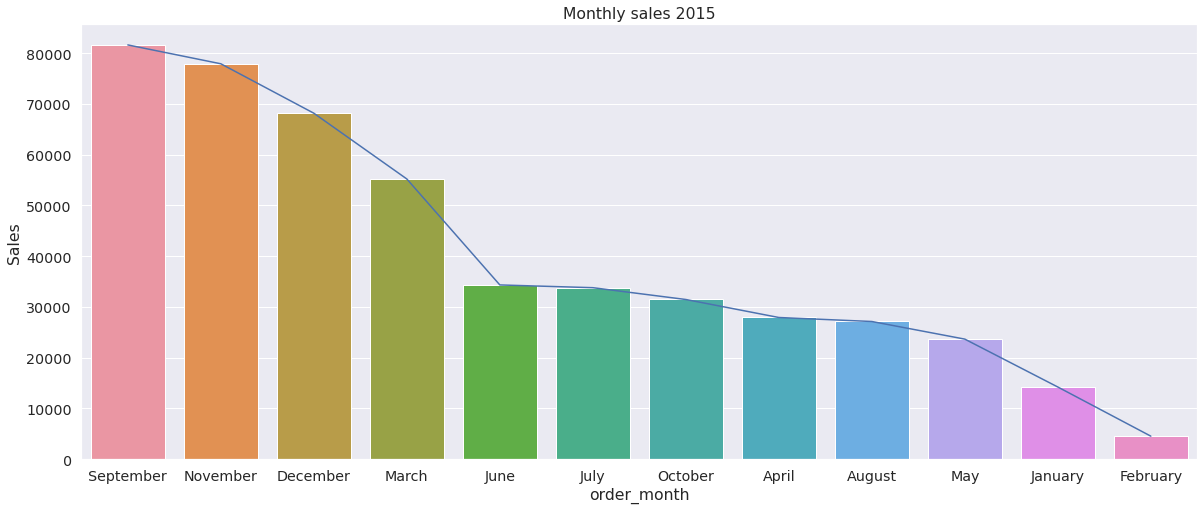

In [199]:
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
plt.figure(figsize=(20,8))
plt.title('Monthly sales 2015')
sns.lineplot(x= 'order_month', y='Sales', data = monthly_sales_2015)
sns.barplot(x='order_month', y='Sales',data = monthly_sales_2015)
plt.show()

## Change in monthly sales for 2016

In [200]:
monthly_sales_2016 = pd.DataFrame(sales.groupby(year_2016['order_month']).sum()['Sales'].reset_index())
monthly_sales_2016 = monthly_sales_2016.nlargest(12,'Sales')
monthly_sales_2016.head(12)


,order_month,Sales
9,November,75249.3995
2,December,74543.6012
11,September,63133.6060
1,August,36818.3422
0,April,34154.4685
7,March,32339.3184
10,October,31011.7375
8,May,29959.5305
5,July,28608.2590
6,June,23599.3740


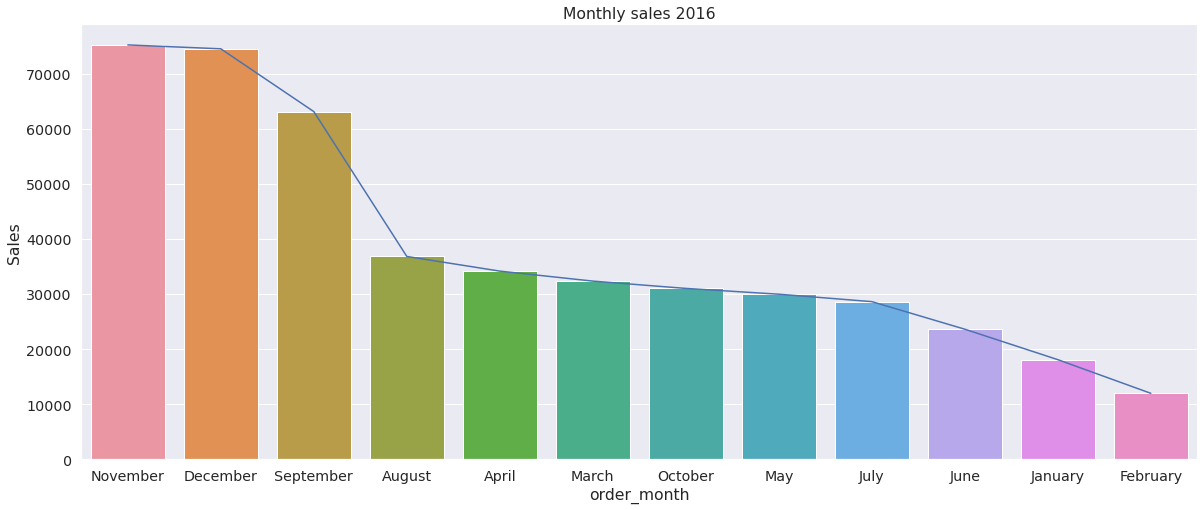

In [201]:
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
plt.figure(figsize=(20,8))
plt.title('Monthly sales 2016')
sns.lineplot(x= 'order_month', y='Sales', data = monthly_sales_2016)
sns.barplot(x='order_month', y='Sales',data = monthly_sales_2016)
plt.show()

## Change in monthly sales for 2017


In [202]:
monthly_sales_2017 = pd.DataFrame(sales.groupby(year_2017['order_month']).sum()['Sales'].reset_index())
monthly_sales_2017 = monthly_sales_2017.nlargest(12,'Sales')
monthly_sales_2017.head(12)


,order_month,Sales
2,December,95739.1210
9,November,79066.4958
11,September,69193.3909
10,October,59583.0330
8,May,56656.9080
7,March,51165.0590
6,June,39724.4860
0,April,38679.7670
5,July,38320.7830
1,August,30542.2003


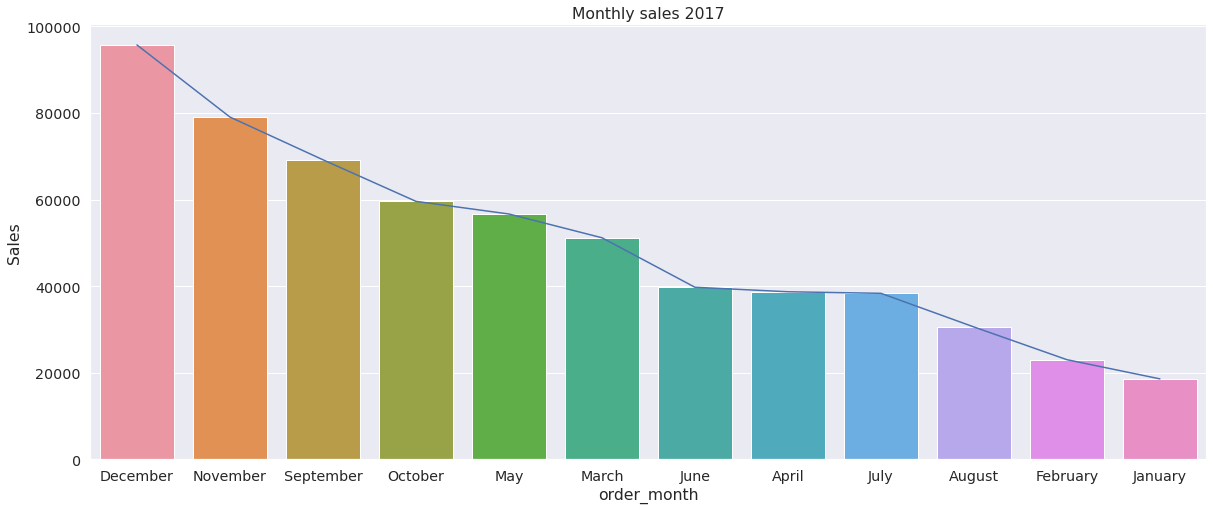

In [203]:
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
plt.figure(figsize=(20,8))
plt.title('Monthly sales 2017')
sns.lineplot(x= 'order_month', y='Sales', data = monthly_sales_2017)
sns.barplot(x='order_month', y='Sales',data = monthly_sales_2017)
plt.show()

## Change in monthly sales for 2018


In [204]:
monthly_sales_2018 = pd.DataFrame(sales.groupby(year_2018['order_month']).sum()['Sales'].reset_index())
monthly_sales_2018 = monthly_sales_2018.nlargest(12,'Sales')
monthly_sales_2018.head(12)


,order_month,Sales
9,November,117938.1550
11,September,86152.8880
2,December,83030.3888
10,October,77448.1312
1,August,62837.8480
7,March,58863.4128
6,June,48190.7277
5,July,44825.1040
8,May,43825.9822
4,January,43476.4740


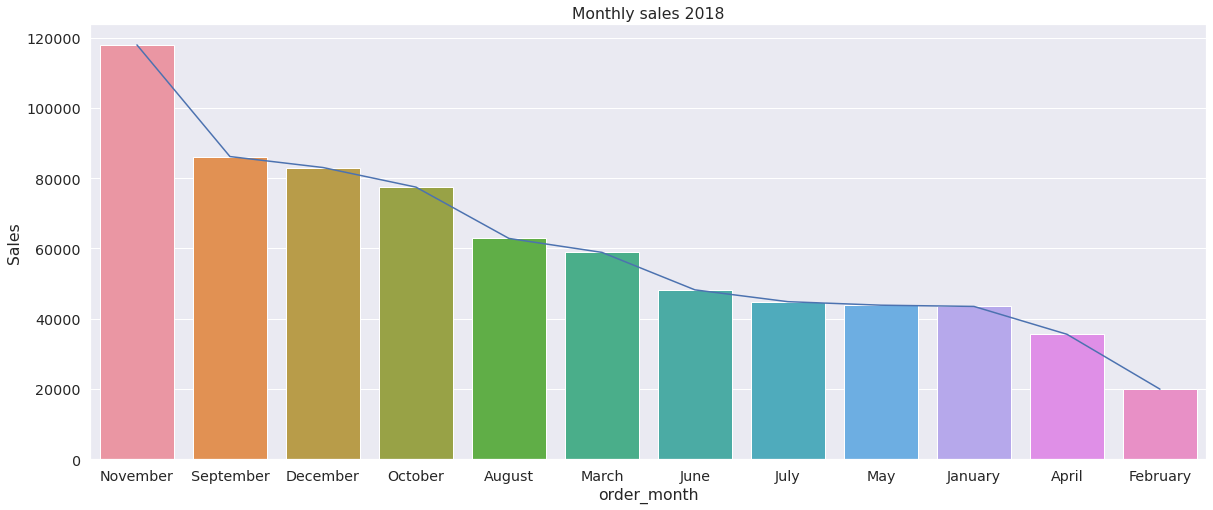

In [205]:
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
plt.figure(figsize=(20,8))
plt.title('Monthly sales 2018')
sns.lineplot(x= 'order_month', y='Sales', data = monthly_sales_2018)
sns.barplot(x='order_month', y='Sales',data = monthly_sales_2018)
plt.show()